# Machine Learning: AllLife Bank Personal Loan Campaign

| Author Project Submission| Date |
| --- | --- |
| Rob Barker | July 20, 2024 | 

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

### Development Environment
* Local development with Visual Studio Code.
* Jupyter Notebook and Python 3.11.7 with Anaconda3. 
* Google Colab/Drive not used.
* Generated HTML using the jupyter cli

   ```jupyter nbconvert --to html PYF_Project_LearnerNotebook_FullCode.ipynb```
* Added --- (markdown) lines for easier readability for myself. 

### Formatting Notes
* Added line separators for readability.

---
---
## Data & Environment Preparation

### Importing necessary libraries

In [716]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

# Visual Studio Code implementation using %pip.
%pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

Note: you may need to restart the kernel to use updated packages.


In [717]:
# Libraries to help with reading and manipulating data.
import pandas as pd
import numpy as np

# libaries to help with data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to help with data preprocessing.
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter

# Removes the limit for the number of displayed columns.
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows.
pd.set_option("display.max_rows", 200)

# Library to split data.
from sklearn.model_selection import train_test_split

# To build model for prediction.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models.
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores.
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    classification_report,
)

# Suppress warnings (FutureWarning).
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)

### Loading the dataset

In [718]:
# Read the dataset from the Loan_Modelling.csv file locally. Pandas DataFrame object 
# assigned to personal_loan_df.
personal_load_df_original = pd.read_csv("/Users/barkz/Desktop/github-barkz/Personal-Loan-Campaign/Loan_Modelling.csv")

# Create a copy of the original DataFrame to avoid modifying the original data.
personal_loan_df = personal_load_df_original.copy()

---
---
## Understanding the Structure of the Data
**Note:** All observations are summarized at the bottomn of the Data Overview section.

### Data Overview

* Observations
* Sanity checks

In [720]:
# Retrieve first 5 rows of the dataset.
print('First 5 rows of the dataset:')
print(personal_loan_df.head(5).to_string(index=False))

print()

# Retrieve last 5 rows of the dataset.
print('Last 5 rows of the dataset:')
print(personal_loan_df.tail(5).to_string(index=False))

First 5 rows of the dataset:
 ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  CreditCard
  1   25           1      49    91107       4    1.6          1         0              0                   1           0       0           0
  2   45          19      34    90089       3    1.5          1         0              0                   1           0       0           0
  3   39          15      11    94720       1    1.0          1         0              0                   0           0       0           0
  4   35           9     100    94112       1    2.7          2         0              0                   0           0       0           0
  5   35           8      45    91330       4    1.0          2         0              0                   0           0       0           1

Last 5 rows of the dataset:
  ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  Personal_Loan  Secur

In [721]:
# Number of rows and columns in the data using the shape attribute of the DataFrame.
rows, columns = personal_loan_df.shape

# Print the number of rows and columns from the dataset. Output is formatted into thousands. 
# There are only 9 columns but for consistency, the output includes (,) format.
print(f'Number of Rows: {rows:,}')
print(f'Number of Columns: {columns:,}')

Number of Rows: 5,000
Number of Columns: 14


In [722]:
# Retrieve summary information of the DataFrame using the info() method.
personal_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [723]:
# Determine if there is any missing data.
missing_values = personal_loan_df.isnull().sum()

# Check for nulls and NaN values in the dataset.
print('Null values ' + str(personal_loan_df.isnull().sum()) + '\n')
print('NaN values ' + str(personal_loan_df.isna().sum()) + '\n')

# Output if there are any missing data points in the dataset.
if missing_values.sum() > 0:
    print('There are missing data points in the Personal Loan dataset.')
else:
    print('There are no missing data points in the Personal Load dataset.')

Null values ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

NaN values ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are no missing data points in the Personal Load dataset.


In [725]:
# Retrieve full statistics of the dataset.
personal_loan_df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [726]:
# Using the describe() function with (include-'all').T can make the data more readable.
personal_loan_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [727]:
# Drop the ID column from the dataset.
if 'ID' in personal_loan_df.columns:
    personal_loan_df.drop(['ID'], axis=1, inplace=True)

# Retrieve the first 5 rows of the dataset after dropping the ID column.
print('First 5 rows of the dataset after dropping the ID column:')
print(personal_loan_df.head(5).to_string(index=False))

First 5 rows of the dataset after dropping the ID column:
 Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  CreditCard
  25           1      49    91107       4    1.6          1         0              0                   1           0       0           0
  45          19      34    90089       3    1.5          1         0              0                   1           0       0           0
  39          15      11    94720       1    1.0          1         0              0                   0           0       0           0
  35           9     100    94112       1    2.7          2         0              0                   0           0       0           0
  35           8      45    91330       4    1.0          2         0              0                   0           0       0           1


In [728]:
# Find correlation between the variables in the dataset.
personal_loan_df.corr()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,-0.030530,-0.030456,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.046418,-0.052563,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.001232,-0.002616,0.002422,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [729]:
# Calculate the distribution of mortgages.
mortgage_distribution = personal_loan_df['Mortgage'].value_counts()

# Sort the distribution in descending order.
mortgage_distribution_sorted = mortgage_distribution.sort_values(ascending=False)

# Format the mortgage values into dollars.
mortgage_distribution_sorted.index = mortgage_distribution_sorted.index.map(lambda x: f'${x:,.0f}K')

# Print the distribution of mortgages.
print('Distribution of Mortgages (descending order):')
print(mortgage_distribution_sorted)

Distribution of Mortgages (descending order):
$0K      3462
$98K       17
$119K      16
$91K       16
$103K      16
         ... 
$281K       1
$577K       1
$302K       1
$405K       1
$541K       1
Name: Mortgage, Length: 347, dtype: int64


In [730]:
# Create a cross-tabulation of ZIP code and Education.
zip_education_crosstab = pd.crosstab(personal_loan_df['ZIPCode'], personal_loan_df['Education'])

# Filter rows where education level count is greater than 20.
zipcode_education_sorted = zip_education_crosstab[zip_education_crosstab > 20].dropna(how='all')

# Print the cross-tabulation of ZIP code and Education.
print('Cross-tabulation of ZIP code and Education:')
print(zipcode_education_sorted.to_string())

Cross-tabulation of ZIP code and Education:
Education     1     2     3
ZIPCode                    
90089      22.0   NaN   NaN
90095      25.0   NaN  26.0
90245       NaN   NaN  21.0
91320      22.0   NaN   NaN
92037      25.0   NaN   NaN
92121      25.0   NaN   NaN
93106       NaN   NaN  22.0
93943      28.0   NaN   NaN
94025       NaN   NaN  22.0
94305      51.0  40.0  36.0
94720      68.0  49.0  52.0
95616      47.0  36.0  33.0


In [731]:
# Check for zero or negative values in columns.
columns_to_check = ['Income', 'CCAvg', 'Mortgage','Securities_Account', 'CD_Account', 'Online', 'CreditCard']
for column in columns_to_check:
    invalid_values = personal_loan_df[personal_loan_df[column] <= 0]
    print(f'Number of rows with non-positive values in {column}: {len(invalid_values)}')

Number of rows with non-positive values in Income: 0
Number of rows with non-positive values in CCAvg: 106
Number of rows with non-positive values in Mortgage: 3462
Number of rows with non-positive values in Securities_Account: 4478
Number of rows with non-positive values in CD_Account: 4698
Number of rows with non-positive values in Online: 2016
Number of rows with non-positive values in CreditCard: 3530


In [732]:
# Checking to see if there is a correlation between Education level and Mortgage amount.
# Calculate the correlation between 'Mortgage' and 'Education'
correlation = personal_loan_df['Mortgage'].corr(personal_loan_df['Education'])

print(f"The correlation between Mortgage and Education is: {correlation}")

The correlation between Mortgage and Education is: -0.03332712462995044


### Observations

**General Data Observations**
* There are no missing data points in the Personal Load dataset. 
* Memory usage of the DataFrame is 547.0 KB.
* Number of Rows: 5,000 and number of Columns: 14
* There are no non-null vales in the Personal Loan dataset. 
* There are 3,462 customers that do no have a mortage.
* ZIP code 94720 has the highest number of mortgage customers with 169.
* ZIP code 94720 has the highest number of educational levels, 68 Undergrad, 49 Graduate and 52 Advanced/Professional.
* `Income`, `CCAvg`, and `Education` have strong positive correlations with `Personal_Loan`, indicating they are important predictors.
* Features like `Mortgage`, `Securities_Account`, `CD_Account`, and `Family` have moderate correlations with `Personal_Loan`, suggesting they might also be useful predictors.

**Feature Observations**
* The strong correlation between Income and CCAvg indicates that both features are important and should be considered in models related to financial behavior.
* The moderate correlations between Income and both Personal_Loan and CCAvg suggest that high-income individuals are good targets for personal loan offers and credit card promotions
* The correlation between Securities_Account and CD_Account suggests that individuals with one type of financial product are more likely to have the other. Financial institutions could consider bundling these products in their marketing strategies.

**ZIP Code Observations**
* The most common ZIP code is 94720 with 169 occurrences, followed by 94305 with 127 occurrences, and 95616 with 116 occurrences. These ZIP codes represent the areas with the highest concentration of individuals in the dataset.
* The top 20 ZIP codes have frequencies ranging from 169 to 34. This indicates that there are several areas with a relatively high number of individuals.
* The high frequencies of certain ZIP codes suggest a concentration of individuals in specific geographical areas. For example, ZIP codes 94720, 94305, and 95616 are likely to be significant regions in the dataset.
Potential Regional Bias:
* The dataset appears to have a regional bias towards certain ZIP codes. This could be due to the sampling method or the nature of the data collection. It is important to consider this bias when making generalizations or building models.
* While there is a concentration in the top ZIP codes, the presence of 20 different ZIP codes in the top frequencies indicates a diverse representation of geographical areas.
* ZIP Code 94720 has 169 occurrences, this ZIP code has the highest representation. This could be a key area for targeted marketing or further analysis.

**Mortgage Observations**
* The most common mortgage amount is $0K, with 3,462 occurrences. This indicates that a significant portion of individuals in the dataset do not have a mortgage.
Distribution of Non-Zero Mortgages:
* The frequencies of non-zero mortgage amounts are significantly lower compared to zero mortgages. The highest frequency among non-zero mortgages is $98K with 17 occurrences, followed by $119K, $91K, and $103K, each with 16 occurrences.
* There is a long tail of mortgage amounts with very low frequencies. Many mortgage amounts (e.g., $281K, $577K, $302K, $405K, $541K) have only 1 occurrence each. This indicates a wide range of mortgage amounts with sparse representation.
* The distribution is heavily skewed towards zero mortgages, with a rapid drop-off in frequency as the mortgage amounts increase. This suggests that most individuals either have no mortgage or relatively low mortgage amounts.
* Education and Mortgage has a -0.0333 which shows no linear relationship between them. 

---
---
## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**Additional Questions**:

6. What is the distribution of mortgages for customers with and without credit cards?
7. Does average spending on credit cards per month impact mortgage amount?
8. Does income impact mortgage amount?
9. Does income reflect higher or lower average credit card spending?
10. What are all of the distributions?
11. What is the relationship between Online Banking Usage vs Education?
12. What is the relationship between Personal Loan vs Education?
13. What is the relationship between Online Banking Usage vs Top 10 ZIP Codes?
14. What is the relationship between having a CD Account vs Education?
15. What is the relationship between having a Average Credit Card spending vs Education?
16. What is the relationship between having a Average Credit Card spending vs Mortgage?
17. What are the relationships between Predictor and Target?

#### **Question 1.** What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

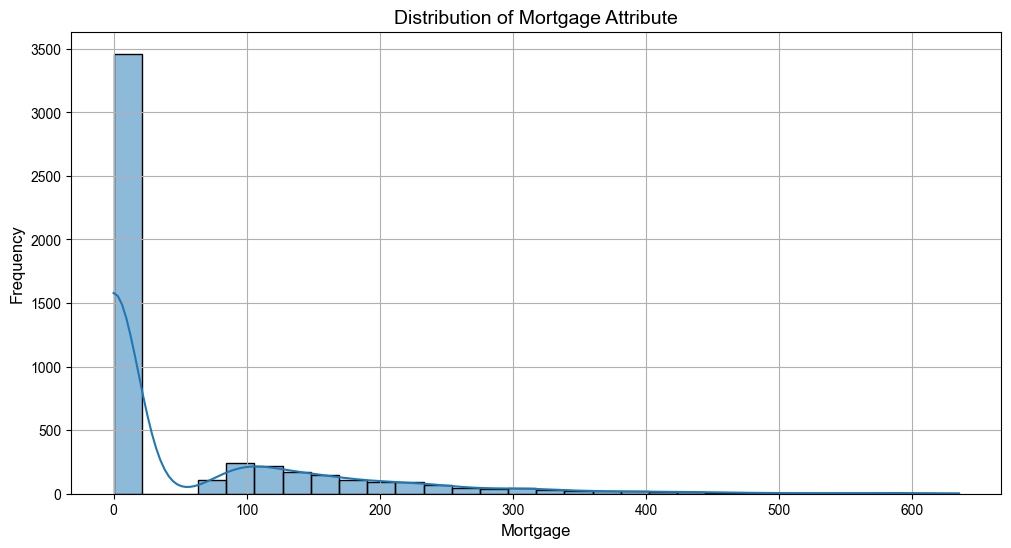

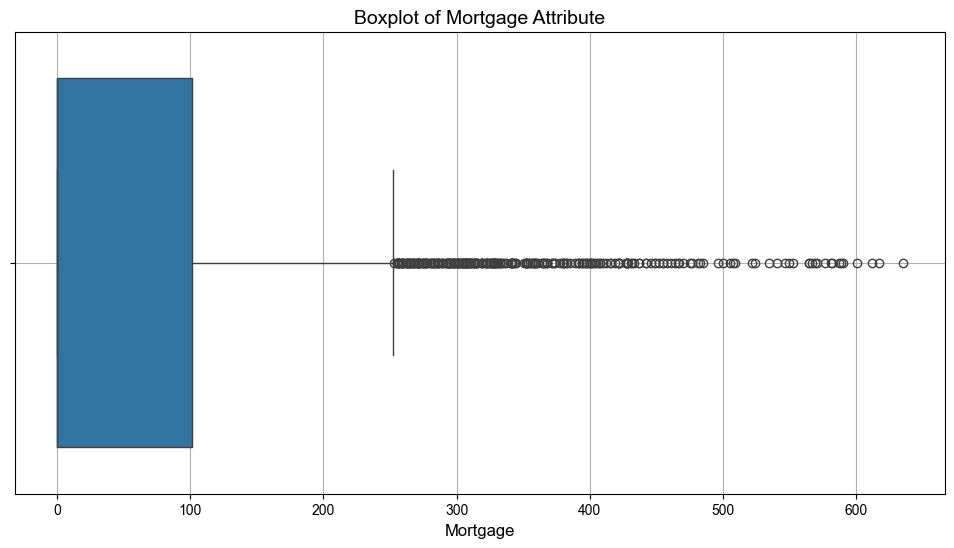

In [733]:
# Plot the distribution of mortgage using a histogram.
plt.figure(figsize=(12, 6))
sns.histplot(personal_loan_df['Mortgage'], bins=30, kde=True)
plt.title('Distribution of Mortgage Attribute')
plt.xlabel('Mortgage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the distribution of mortgage using a boxplot to identify outliers.
plt.figure(figsize=(12, 6))
sns.boxplot(x=personal_loan_df['Mortgage'])
plt.title('Boxplot of Mortgage Attribute')
plt.xlabel('Mortgage')
plt.grid(True)
plt.show()

In [735]:
# Number of customers with no mortgage.
no_mortgage_count = personal_loan_df[personal_loan_df['Mortgage'] == 0].shape[0]

# Total number of customers.
total_customers = personal_loan_df.shape[0]

# Percentage of customers with no mortgage.
percentage_no_mortgage = (no_mortgage_count / total_customers) * 100

print(f"Number of customers with no mortgage: {no_mortgage_count:,}")
print(f"Total number of customers: {total_customers:,}")
print(f'Percentage of customers with no mortgage: {percentage_no_mortgage:.2f}%')

Number of customers with no mortgage: 3,462
Total number of customers: 5,000
Percentage of customers with no mortgage: 69.24%


**Observations**
* 69.24% of customers do not have a mortgage ($0). This is a significant number within the overall customer base.
    * **Recommendation:** Market to these customers with a special program with low introductory rates to capture business.

---

#### **Question 2.** How many customers have credit cards?

In [736]:
# Total number of customers.
total_customers = personal_loan_df.shape[0]

# Number of customers with credit cards from All Life Bank and other banks.
other_cc = personal_loan_df[personal_loan_df['CreditCard'] == 1].shape[0]
all_life_bank_cc = personal_loan_df[personal_loan_df['CreditCard'] == 0].shape[0]

print(f'Number of customers with All Life Bank credit card: {all_life_bank_cc:,}')
print(f'Number of customers using a credit card at another bank: {other_cc:,}')
print(f'Total number of customers: {total_customers:,}')
print(f'Percentage of customers with credit cards: {(other_cc / total_customers * 100):.2f}%')

Number of customers with All Life Bank credit card: 3,530
Number of customers using a credit card at another bank: 1,470
Total number of customers: 5,000
Percentage of customers with credit cards: 29.40%


**Observations**
* 29.4% of customers have credit cards from other banks.
    * **Recommendation:** Market a special program with low introductory APR to capture business away from competitors.

---

#### **Question 3.** What are the attributes that have a strong correlation with the target attribute (personal loan)?

In [737]:
# Find the highest correlated feature pairs in the personal_loan_df DataFrame. 
correlation_matrix = personal_loan_df.corr(numeric_only=True)

# Unstack the correlation matrix.
correlation_pairs = correlation_matrix.unstack()

# Filter out self-correlations.
filtered_pairs = correlation_pairs[correlation_pairs != 1]

# Sort the correlations in descending order.
sorted_pairs = filtered_pairs.sort_values(ascending=False)

# Display the correlated feature pairs.
highest_correlated_features = sorted_pairs.head(10) 
print(highest_correlated_features)

Age                 Experience            0.994215
Experience          Age                   0.994215
CCAvg               Income                0.645984
Income              CCAvg                 0.645984
                    Personal_Loan         0.502462
Personal_Loan       Income                0.502462
CCAvg               Personal_Loan         0.366889
Personal_Loan       CCAvg                 0.366889
Securities_Account  CD_Account            0.317034
CD_Account          Securities_Account    0.317034
dtype: float64


In [738]:
# Calculate the correlation matrix.
correlation_matrix = personal_loan_df.corr(numeric_only=True)

# Get correlations with the target attribute (Personal Loan).
correlations_with_target = correlation_matrix['Personal_Loan'].drop('Personal_Loan')

# Identify attributes with strong correlations (absolute value > 0.5)
strong_correlations = correlations_with_target[correlations_with_target.abs() > 0.5]

# Print attributes with strong correlations with the target attribute.
print("Attributes with strong correlation with the target attribute Personal_Loan):")
for attribute, correlation in strong_correlations.items():
    print(f"{attribute} with Correlation of {correlation}.")

Attributes with strong correlation with the target attribute Personal_Loan):
Income with Correlation of 0.502462292494936.


**Observations** 
| Correlation Data | Value | Interpretation |
| ---- | --- | --- |
| Age and Experience | 0.994215 | There is an extremely high positive correlation between Age and Experience. This is expected as older individuals generally have more work experience. |
| Income and CCAvg | 0.645984 | There is a strong positive correlation between Income and CCAvg (Credit Card Average). This suggests that individuals with higher incomes tend to have higher average credit card spending. |
| Income and Personal_Loan | 0.502462 | There is a moderate positive correlation between Income and Personal_Loan. This indicates that individuals with higher incomes are more likely to have personal loans. |
| CCAvg and Personal_Loan | 0.366889 | There is a moderate positive correlation between CCAvg and Personal_Loan. This suggests that individuals with higher average credit card spending are somewhat more likely to have personal loans.
| Securities_Account and CD_Account | 0.317034 | There is a moderate positive correlation between Securities_Account and CD_Account. This indicates that individuals with a securities account are somewhat more likely to have a certificate of deposit (CD) account. |

---

#### **Question 4.** How does a customer's interest in purchasing a loan vary with their age?

Loan Interest by Age Group
------------------------------------------------------------
Age Group: 20-29, Proportion: 0.10040983606557377
Age Group: 30-39, Proportion: 0.10184442662389735
Age Group: 40-49, Proportion: 0.09307875894988067
Age Group: 50-59, Proportion: 0.08845577211394302
Age Group: 60-69, Proportion: 0.10237388724035608


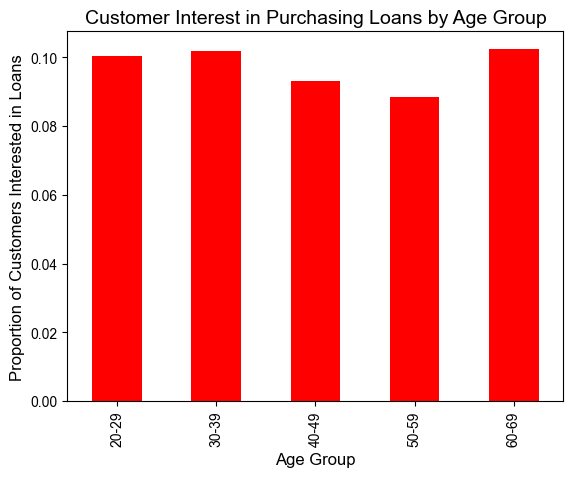

In [739]:
# Create age bins.
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']
personal_loan_df['AgeGroup'] = pd.cut(personal_loan_df['Age'], bins=bins, labels=labels, right=False)

# Calculate the proportion of customers interested in loans for each age group.
loan_interest_by_age = personal_loan_df.groupby('AgeGroup')['Personal_Loan'].mean()

# Print proportion of customers interested in loans by age group.
print("Loan Interest by Age Group")
print("-" * 60)
for age_group, proportion in loan_interest_by_age.items():
    print(f"Age Group: {age_group}, Proportion: {proportion}")

# Visualize results.
loan_interest_by_age.plot(kind='bar', color='red')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Customers Interested in Loans')
plt.title('Customer Interest in Purchasing Loans by Age Group')
plt.show()

**Observations**
* There is no significant interest difference between age groups that are interested in a personal loan.
    * Customers broken down into age groups and their interest in loans:
        * Age Group 20-29: ~10.04%
        * Age Group 30-39: ~10.18%
        * Age Group 40-49: ~9.31%
        * Age Group 50-59: ~8.85%
        * Age Group 60-69: ~10.24%

---

#### **Question 5.** How does a customer's interest in purchasing a loan vary with their education?

Loan Interest by Education Level
------------------------------------------------------------
Education Level: 1, Proportion: 0.044370229007633585
Education Level: 2, Proportion: 0.12972202423378476
Education Level: 3, Proportion: 0.13657561625582945


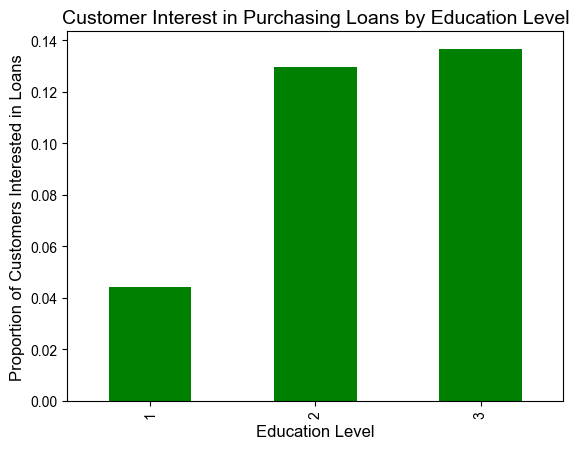

In [740]:
# Calculate the proportion of customers interested in loans for each education level.
loan_interest_by_education = personal_loan_df.groupby('Education')['Personal_Loan'].mean()

# Print proportion of customers interested in loans by education level.
# 1: Undergrad; 2: Graduate; 3: Advanced/Professional
print("Loan Interest by Education Level")
print("-" * 60)
for education_level, proportion in loan_interest_by_education.items():
    print(f"Education Level: {education_level}, Proportion: {proportion}")

# Visualize results.
loan_interest_by_education.plot(kind='bar', color='green')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Customers Interested in Loans')
plt.title('Customer Interest in Purchasing Loans by Education Level')
plt.show()

**Observations**
* Undergraduates at 4.44% is a very low percentrage interested in loans. This could be related to those individuals have student debt and not interested in credit card expenses or high APR.
    **Recommendation:** A special program with a low APR or a no interest rate penalty for a time period could interest this individuals. 
* Both Graduates (12.97%) and Advanced/Professionals (13.66%) are more interested in personal loans. This could be related to greater financial stability and money management experience.

---

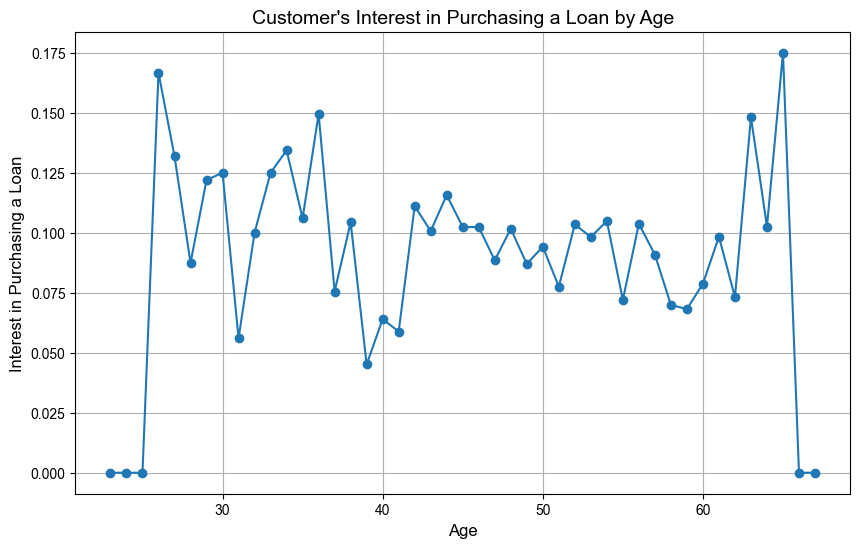

In [741]:
# Group by age and calculate the mean interest in purchasing a loan.
age_interest_df = personal_loan_df.groupby('Age')['Personal_Loan'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(age_interest_df['Age'], age_interest_df['Personal_Loan'], marker='o')

# Add labels and title.
plt.title("Customer's Interest in Purchasing a Loan by Age")
plt.xlabel('Age')
plt.ylabel('Interest in Purchasing a Loan')
plt.grid(True)
plt.show()

---

#### **Question 6.** What is the distribution of mortgages for customers with and without credit cards?

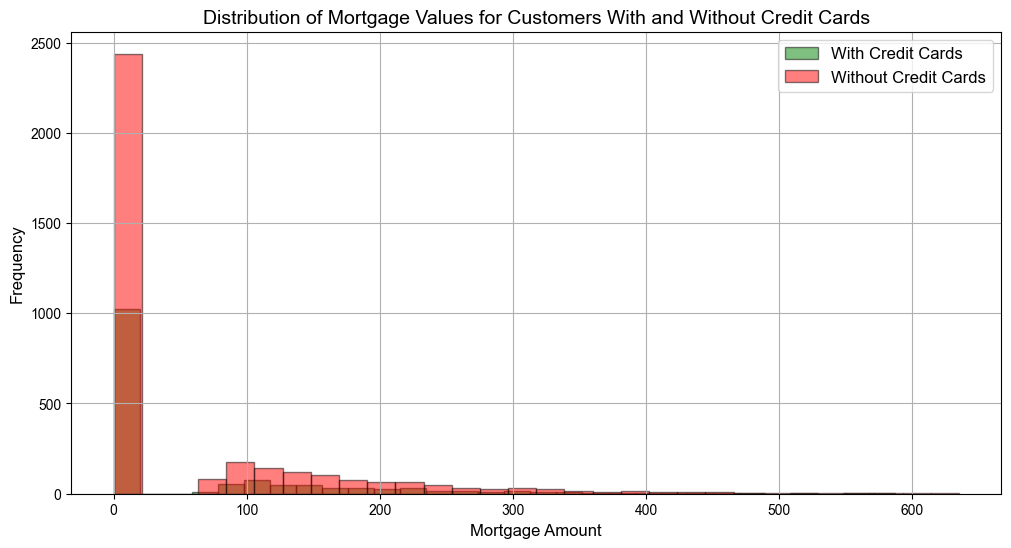

In [748]:
# Filter the dataframe for customers with and without credit cards.
with_credit_cards = personal_loan_df[personal_loan_df['CreditCard'] == 1]
without_credit_cards = personal_loan_df[personal_loan_df['CreditCard'] == 0]

# Plot the distribution of mortgage values for customers with and without credit cards.
plt.figure(figsize=(12, 6))

# Overlay the histograms for customers with and without credit cards.
plt.hist(with_credit_cards['Mortgage'], bins=30, alpha=0.5, label='With Credit Cards', edgecolor='k',color='green')
plt.hist(without_credit_cards['Mortgage'], bins=30, alpha=0.5, label='Without Credit Cards', edgecolor='k', color='red')

# Add labels and title.
plt.title('Distribution of Mortgage Values for Customers With and Without Credit Cards')
plt.xlabel('Mortgage Amount')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

**Observations**
* There is a higher amount of customers with credit cards that have no mortgage.
* There is a more even distribution across customers with credit cards but is still lower compared to customers with credit cards.  

---

#### **Question 7.** Does average spending on credit cards per month impact mortgage amount?

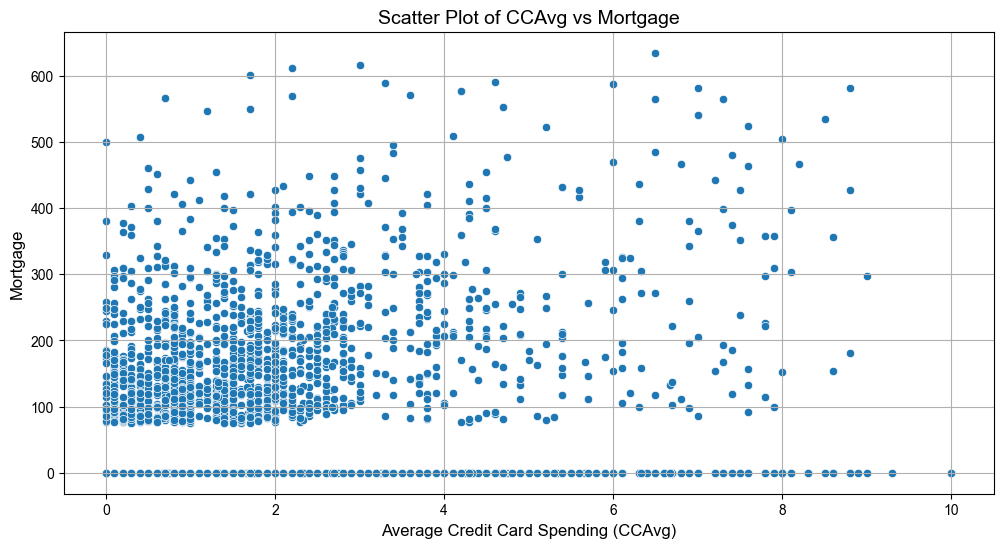

In [749]:
# Create scatter plot of CCAvg vs Mortgage to identify any patterns.
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CCAvg', y='Mortgage', data=personal_loan_df)
plt.title('Scatter Plot of CCAvg vs Mortgage')
plt.xlabel('Average Credit Card Spending (CCAvg)')
plt.ylabel('Mortgage')
plt.grid(True)
plt.show()

**Observations**
* The majority of data points cluster in the lower left corner, indicating that lower average credit card spending is associated with lower mortgage values.
* There are less data points as average credit card spending increases, suggesting higher credit card spending doesn’t necessarily correlate with higher mortgages.

---

#### **Question 8.** Does income impact mortgage amount?

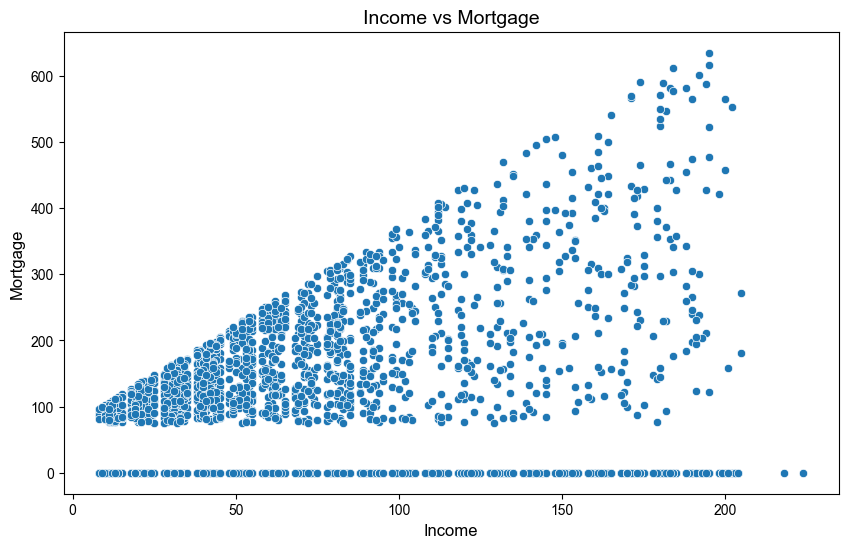

In [750]:
# Create a scatter plot showinbg the relationship between income and mortgage.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Mortgage', data=personal_loan_df)

# Add titles and labels.
plt.title('Income vs Mortgage')
plt.xlabel('Income')
plt.ylabel('Mortgage')

# Show the plot.
plt.show()

---

#### **Question 9.** Does income reflect higher or lower average credit card spending?

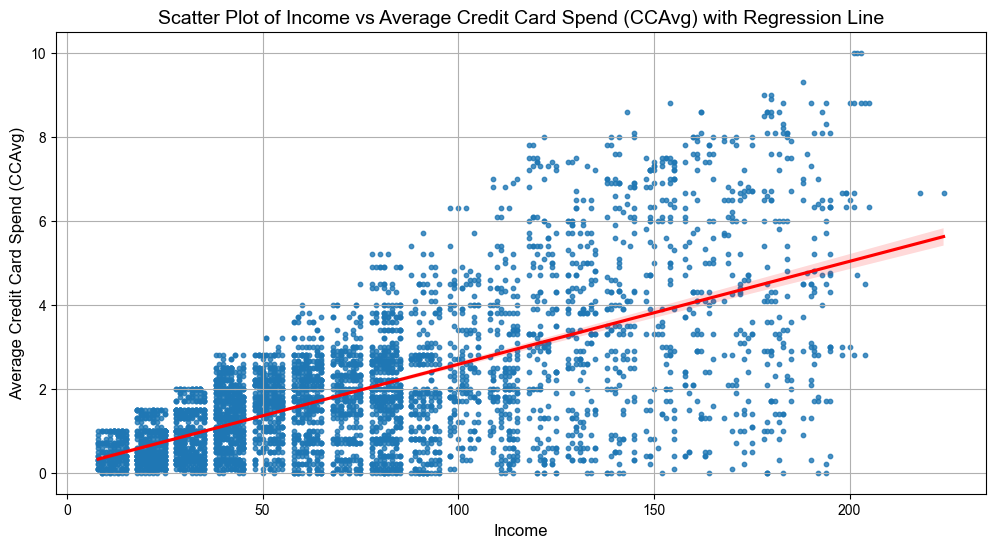

In [751]:
# Scatter plot of Income vs CCAvg with regression line.
plt.figure(figsize=(12, 6))
sns.regplot(x='Income', y='CCAvg', data=personal_loan_df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Scatter Plot of Income vs Average Credit Card Spend (CCAvg) with Regression Line')
plt.xlabel('Income')
plt.ylabel('Average Credit Card Spend (CCAvg)')
plt.grid(True)
plt.show()

**Observations**
* The graph shows a positive correlation between income and average credit card spending. As income increases, average credit card spending tends to rise.
* Beyond an income level of ~$100,000, the increase in credit card spending slows down.
* Customers with higher incomes tend to spend more on credit cards.

---

#### **Question 10.** What are all of the distributions?

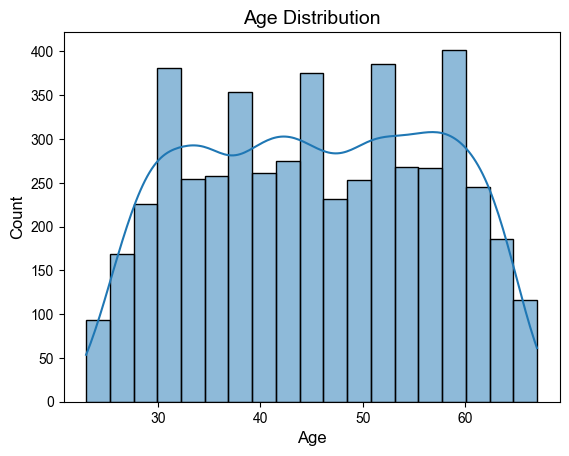

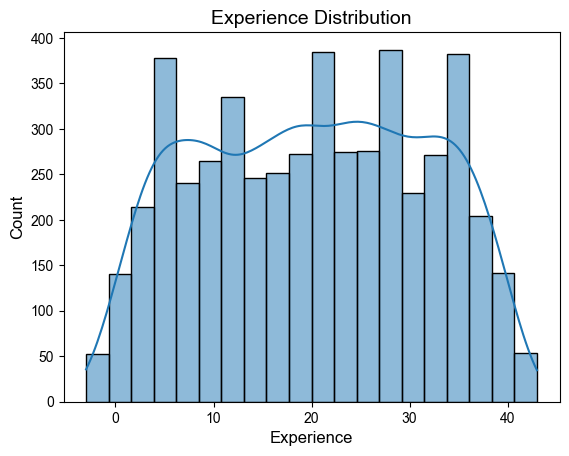

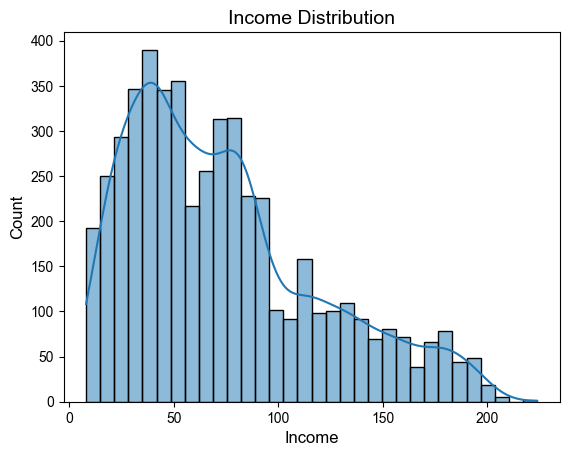

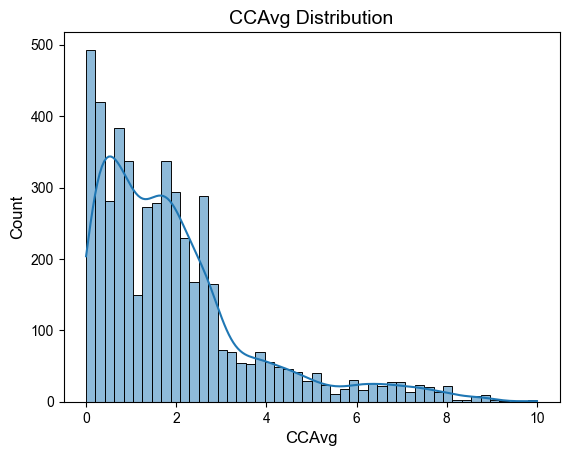

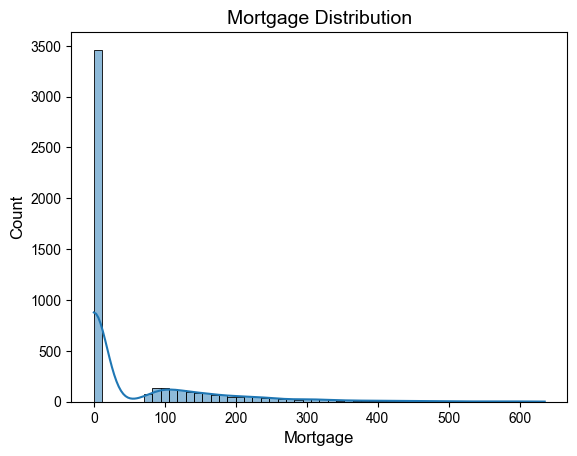

In [752]:
# Distributions

# Age.
sns.histplot(personal_loan_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Experience.
sns.histplot(personal_loan_df['Experience'], kde=True)
plt.title('Experience Distribution')
plt.show()

# Income.
sns.histplot(personal_loan_df['Income'], kde=True)
plt.title('Income Distribution')
plt.show()

# CCAvg.
sns.histplot(personal_loan_df['CCAvg'], kde=True)
plt.title('CCAvg Distribution')
plt.show()

# Mortgage.
sns.histplot(personal_loan_df['Mortgage'], kde=True)
plt.title('Mortgage Distribution')
plt.show()

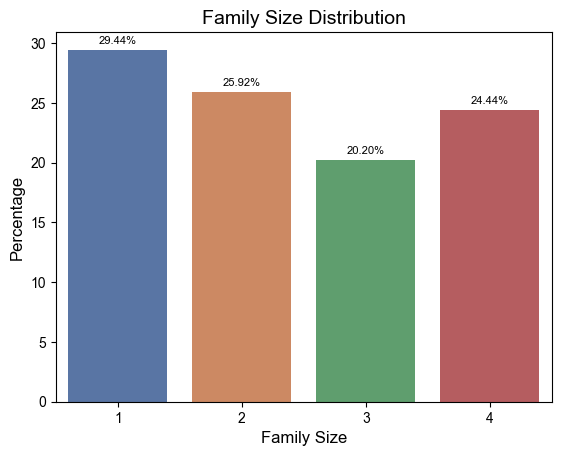

In [753]:
# Calculate the percentage of each family size.
family_counts = personal_loan_df['Family'].value_counts(normalize=True) * 100

# Ensure the values are in order
family_counts = family_counts.sort_index()  

# Create the barplot.
sns.barplot(x=family_counts.index, y=family_counts.values, palette="deep")
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Percentage')

# Add percentages on top of the bars.
for index, value in enumerate(family_counts.values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')

plt.show()

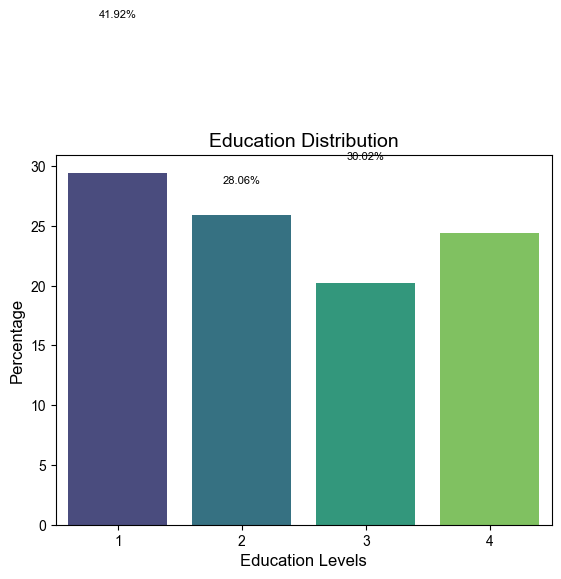

In [757]:
# Calculate the percentage of education levels.
edu_counts = personal_loan_df['Education'].value_counts(normalize=True) * 100

# Ensure the values are in order.
edu_counts = edu_counts.sort_index()  

# Create the barplot.
sns.barplot(x=family_counts.index, y=family_counts.values, palette='viridis')
plt.title('Education Distribution')
plt.xlabel('Education Levels')
plt.ylabel('Percentage')

# Add percentages on top of the bars.
for index, value in enumerate(edu_counts.values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')

plt.show()

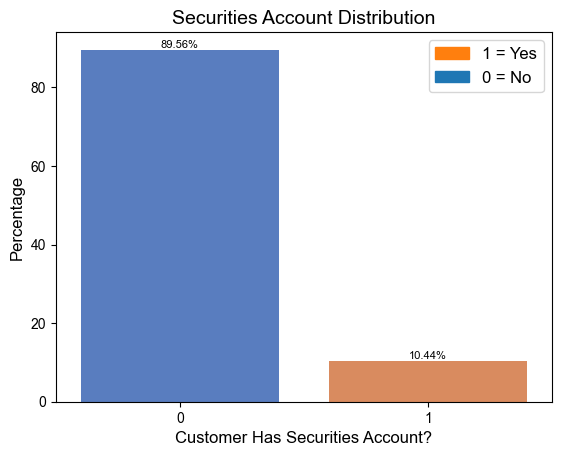

In [758]:
# Calculate the percentage of securities accounts.
sec_accts_counts = personal_loan_df['Securities_Account'].value_counts(normalize=True) * 100

# Ensure the values are in order.
sec_accts_counts = sec_accts_counts.sort_index()  

# Create the barplot.
sns.barplot(x=sec_accts_counts.index, y=sec_accts_counts.values, palette='muted')
plt.title('Securities Account Distribution')
plt.xlabel('Customer Has Securities Account?')
plt.ylabel('Percentage')

# Add percentages on top of the bars.
for index, value in enumerate(sec_accts_counts.values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')

# Create a legend.
no_patch = mpatches.Patch(color='C0', label='0 = No')
yes_patch = mpatches.Patch(color='C1', label='1 = Yes')

plt.legend(handles=[yes_patch, no_patch])
plt.show()


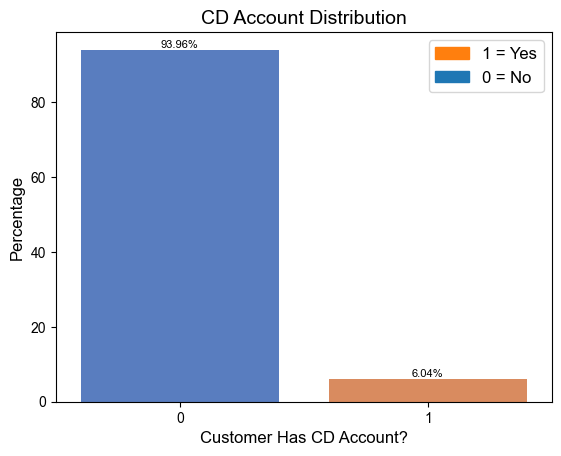

In [759]:
# Calculate the percentage of securities accounts.
cd_accts_counts = personal_loan_df['CD_Account'].value_counts(normalize=True) * 100

# Ensure the values are in order.
cd_accts_counts = cd_accts_counts.sort_index()  

# Create the barplot.
sns.barplot(x=cd_accts_counts.index, y=cd_accts_counts.values, palette='muted')
plt.title('CD Account Distribution')
plt.xlabel('Customer Has CD Account?')
plt.ylabel('Percentage')

# Add percentages on top of the bars.
for index, value in enumerate(cd_accts_counts.values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')

# Create a legend.
no_patch = mpatches.Patch(color='C0', label='0 = No')
yes_patch = mpatches.Patch(color='C1', label='1 = Yes')

plt.legend(handles=[yes_patch, no_patch])
plt.show()

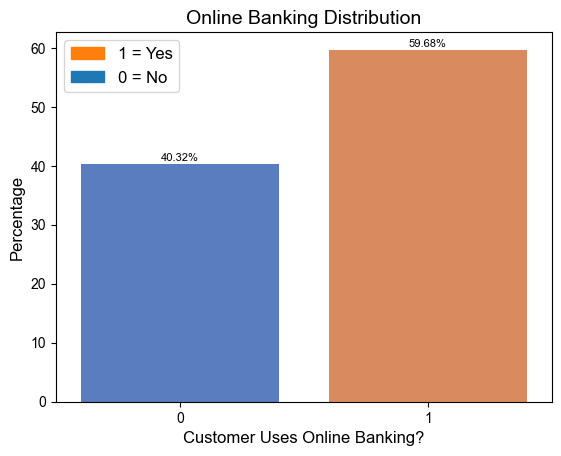

In [760]:
# Calculate the percentage of online users.
online_user_counts = personal_loan_df['Online'].value_counts(normalize=True) * 100

# Ensure the values are in order.
online_user_counts = online_user_counts.sort_index()  

# Create the barplot.
sns.barplot(x=online_user_counts.index, y=online_user_counts.values, palette='muted')
plt.title('Online Banking Distribution')
plt.xlabel('Customer Uses Online Banking?')
plt.ylabel('Percentage')

# Add percentages on top of the bars.
for index, value in enumerate(online_user_counts.values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')

# Create a legend.
no_patch = mpatches.Patch(color='C0', label='0 = No')
yes_patch = mpatches.Patch(color='C1', label='1 = Yes')

plt.legend(handles=[yes_patch, no_patch])
plt.show()

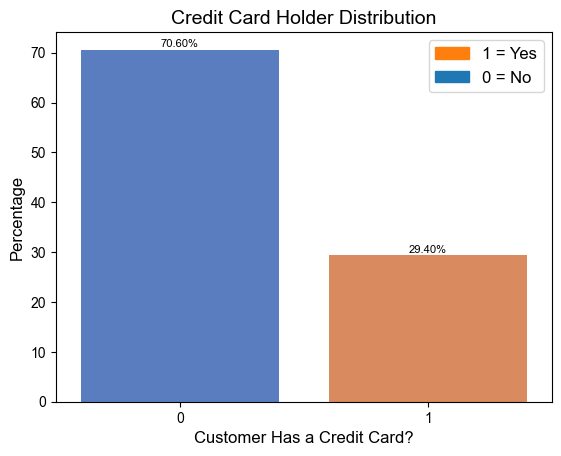

In [761]:
# Calculate the percentage of online users.
cc_holder_counts = personal_loan_df['CreditCard'].value_counts(normalize=True) * 100

# Ensure the values are in order.
cc_holder_counts = cc_holder_counts.sort_index()  

# Create the barplot.
sns.barplot(x=cc_holder_counts.index, y=cc_holder_counts.values, palette='muted')
plt.title('Credit Card Holder Distribution')
plt.xlabel('Customer Has a Credit Card?')
plt.ylabel('Percentage')

# Add percentages on top of the bars.
for index, value in enumerate(cc_holder_counts.values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')

# Create a legend.
no_patch = mpatches.Patch(color='C0', label='0 = No')
yes_patch = mpatches.Patch(color='C1', label='1 = Yes')

plt.legend(handles=[yes_patch, no_patch])
plt.show()

In [762]:
# Calculate the total counts of each ZIP code.
zipcode_counts = personal_loan_df['ZIPCode'].value_counts()

# Calculate the percentage for each ZIP code.
zipcode_percentages = (zipcode_counts / zipcode_counts.sum()) * 100

# Select the top 50 ZIP codes.
top_50_zipcodes = zipcode_counts.head(50)
top_50_percentages = zipcode_percentages.head(50)

# Convert the result to a DataFrame.
top_50_zipcode_df = pd.DataFrame({
    'ZIPCode': top_50_zipcodes.index,
    'Count': top_50_zipcodes.values,
    'Percentage': top_50_percentages.values
})

# Format the 'Percentage' column to two decimal places.
top_50_zipcode_df['Percentage'] = top_50_zipcode_df['Percentage'].map('{:.2f}%'.format)

# Display the DataFrame as a table.
print(top_50_zipcode_df)

    ZIPCode  Count Percentage
0     94720    169      3.38%
1     94305    127      2.54%
2     95616    116      2.32%
3     90095     71      1.42%
4     93106     57      1.14%
5     93943     54      1.08%
6     92037     54      1.08%
7     91320     53      1.06%
8     91711     52      1.04%
9     94025     52      1.04%
10    92093     51      1.02%
11    90024     50      1.00%
12    90245     50      1.00%
13    90089     46      0.92%
14    91330     46      0.92%
15    92121     45      0.90%
16    94304     45      0.90%
17    94143     37      0.74%
18    95051     34      0.68%
19    94608     34      0.68%
20    92182     32      0.64%
21    92028     32      0.64%
22    92521     32      0.64%
23    95054     31      0.62%
24    95814     30      0.60%
25    95014     29      0.58%
26    94542     27      0.54%
27    94550     27      0.54%
28    94301     27      0.54%
29    95064     26      0.52%
30    94501     26      0.52%
31    95039     26      0.52%
32    9581

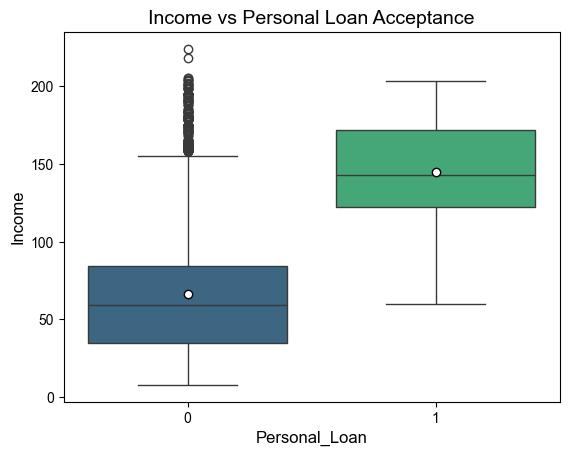

In [763]:
# Income vs Personal Loan Acceptance.
sns.boxplot(x='Personal_Loan', y='Income', data=personal_loan_df, palette='viridis', showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title('Income vs Personal Loan Acceptance')
plt.show()

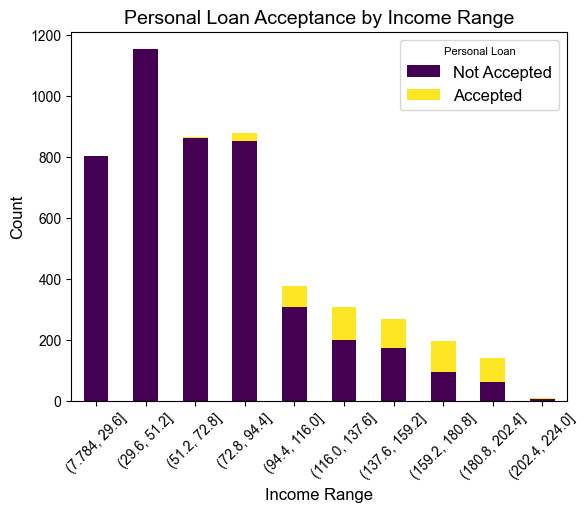

In [764]:
# Find the number of customers who accepted and did not accept the personal loan.

# Bin the Income data into ranges.
income_bins = pd.cut(personal_loan_df['Income'], bins=10)

# Create a crosstab to count the occurrences of each Personal_Loan status within each income range.
income_loan_crosstab = pd.crosstab(income_bins, personal_loan_df['Personal_Loan'])

# Plot the stacked bar plot.
income_loan_crosstab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Personal Loan Acceptance by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['Not Accepted', 'Accepted'])
plt.xticks(rotation=45)
plt.show()

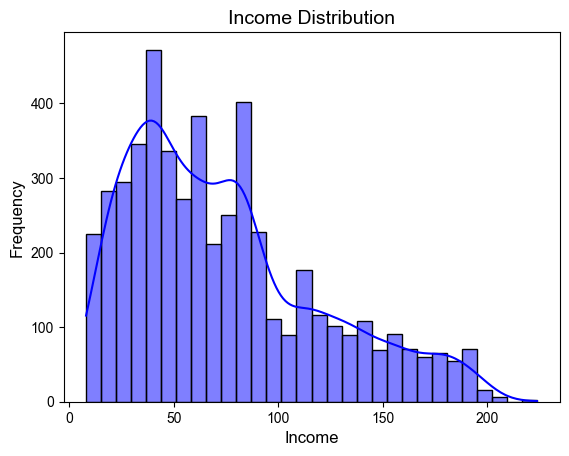

In [765]:
# Create a histogram plot for Income.
sns.histplot(data=personal_loan_df, x='Income', kde=True, bins=30, color='blue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

#### **Question 11.** What is the relationship between Online Banking Usage vs Education?

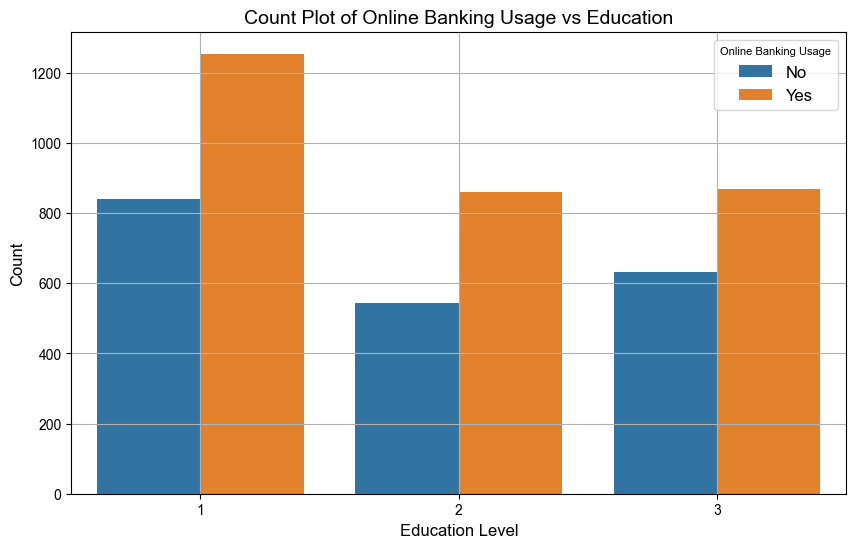

In [766]:
# Create a count plot to visualize the relationship between Online and Education.
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Online', data=personal_loan_df)
plt.title('Count Plot of Online Banking Usage vs Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Online Banking Usage', loc='upper right', labels=['No', 'Yes'])
plt.grid(True)
plt.show()

**Observations**
* The graph shows a positive correlation between education level and online banking usage. As education level increases, the likelihood of using online banking also increases.
* As a single category undergraduates use online banking more than Graduate or Advanced/Professionals. However, combining those customers with advanced degress (Graduate and Advanced/Professional) outweigh the undergraduates.
* Higher education levels may lead to greater digital literacy and comfort with online financial services.

---

#### **Question 12.** What is the relationship between Personal Loan vs Education?

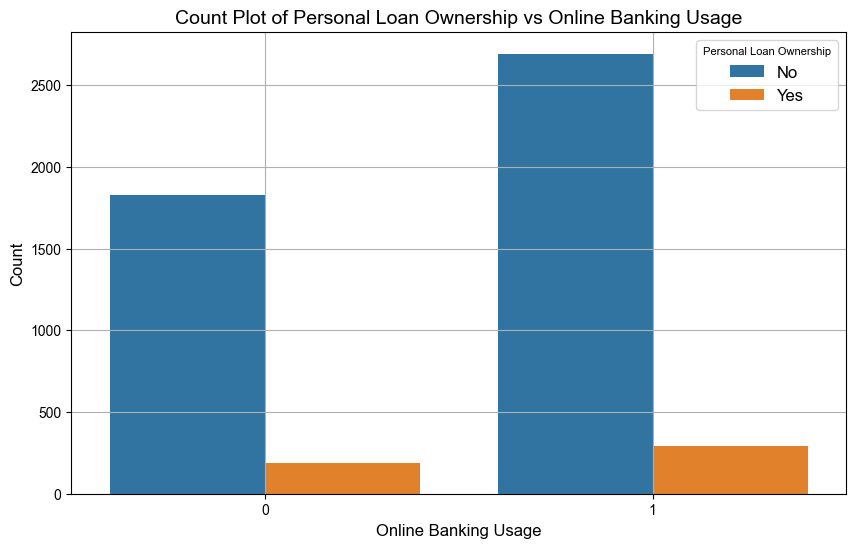

In [767]:
# Create a count plot to visualize the relationship between Online Banking and Personal Loan.
plt.figure(figsize=(10, 6))
sns.countplot(x='Online', hue='Personal_Loan', data=personal_loan_df)
plt.title('Count Plot of Personal Loan Ownership vs Online Banking Usage')
plt.xlabel('Online Banking Usage')
plt.ylabel('Count')
plt.legend(title='Personal Loan Ownership', loc='upper right', labels=['No', 'Yes'])
plt.grid(True)
plt.show()

**Observations**
* There is no relationship between online banking use and owning a personal loan. 

---

#### **Question 13.** What is the relationship between Online Banking Usage vs Top 10 ZIP Codes?

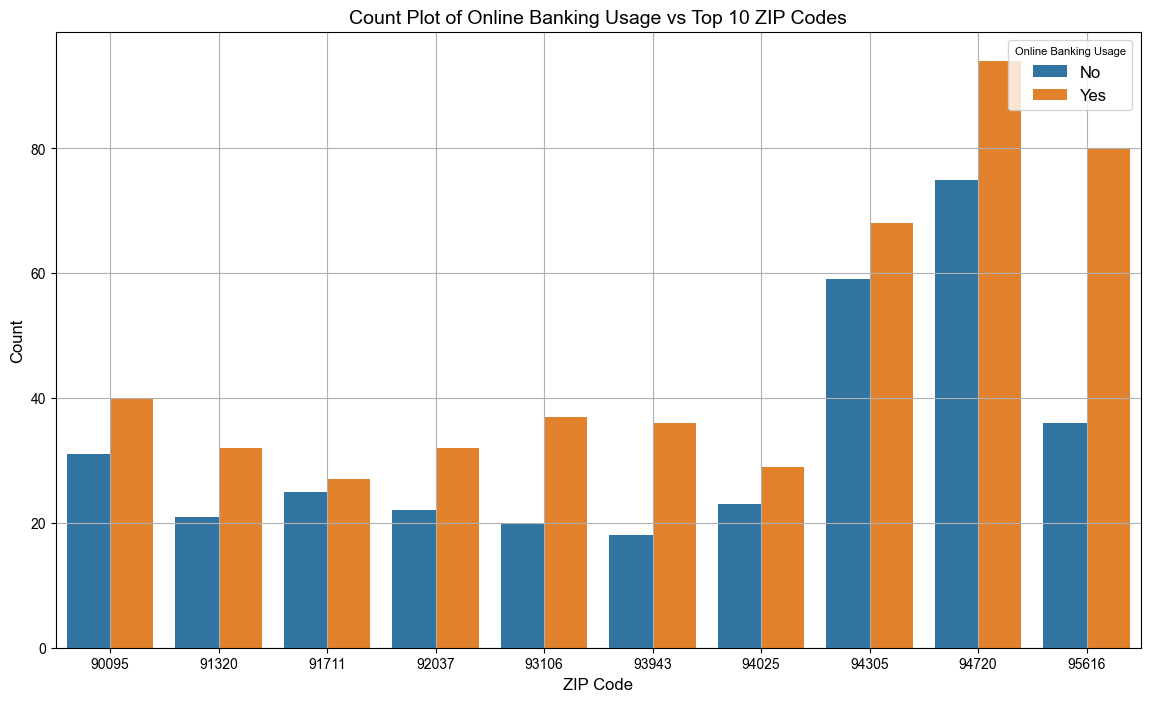

In [768]:
# Get the top 10 ZIP codes by count.
top_10_zip_codes = personal_loan_df['ZIPCode'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top 10 ZIP codes.
top_10_df = personal_loan_df[personal_loan_df['ZIPCode'].isin(top_10_zip_codes)]

# Create a count plot to visualize the relationship between Online and the top 10 ZIP codes.
plt.figure(figsize=(14, 8))
sns.countplot(x='ZIPCode', hue='Online', data=top_10_df)
plt.title('Count Plot of Online Banking Usage vs Top 10 ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.legend(title='Online Banking Usage', loc='upper right', labels=['No', 'Yes'])
plt.grid(True)
plt.show()

**Observations**
* There are three zipcodes, 94720, 95616 and 94305, who are the largest users of online banking. These zipcodes could indicate more affluent areas with higher education levels that are comfortable using online banking.

---

#### **Question 14.** What is the relationship between having a CD Account vs Education?

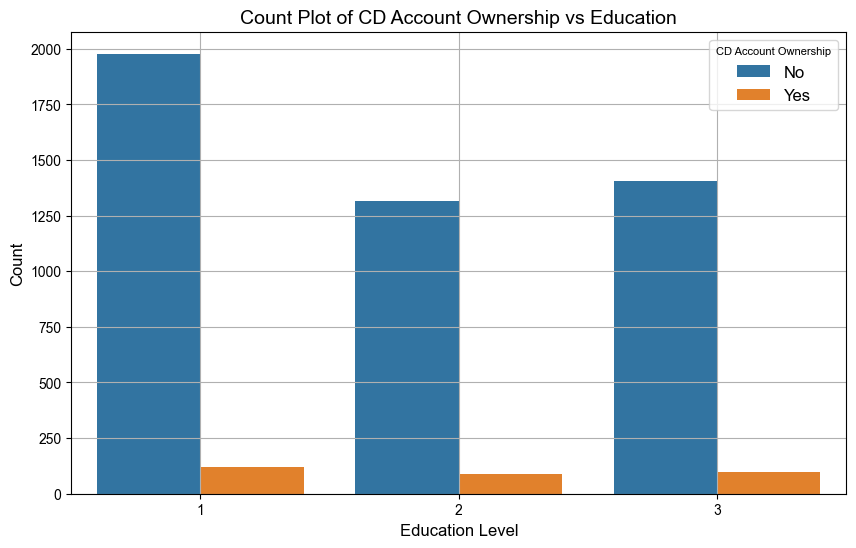

In [769]:
# Create a count plot to visualize the relationship between CD_Account and Education.
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='CD_Account', data=personal_loan_df)
plt.title('Count Plot of CD Account Ownership vs Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='CD Account Ownership', loc='upper right', labels=['No', 'Yes'])
plt.grid(True)
plt.show()

**Observations**
* There is no relationship between customers that own a CD Account vs their level of education.

---

#### **Question 15.** What is the relationship between having a Average Credit Card spending vs Education?

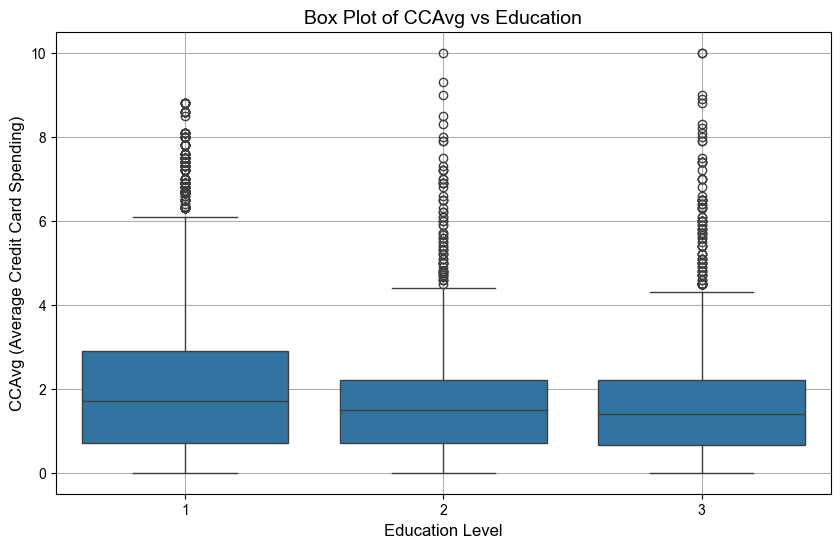

In [770]:
# Create a box plot to visualize the relationship between CCAvg and Education.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='CCAvg', data=personal_loan_df)
plt.title('Box Plot of CCAvg vs Education')
plt.xlabel('Education Level')
plt.ylabel('CCAvg (Average Credit Card Spending)')
plt.grid(True)
plt.show()

**Observations**
* Education level 3 (Advanced/Professional) has the highest median credit card spending.
* Education level 1 (Undergraduates) has the lowest median spending.

---

#### **Question 16.** What is the relationship between having a Average Credit Card spending vs Mortgage?

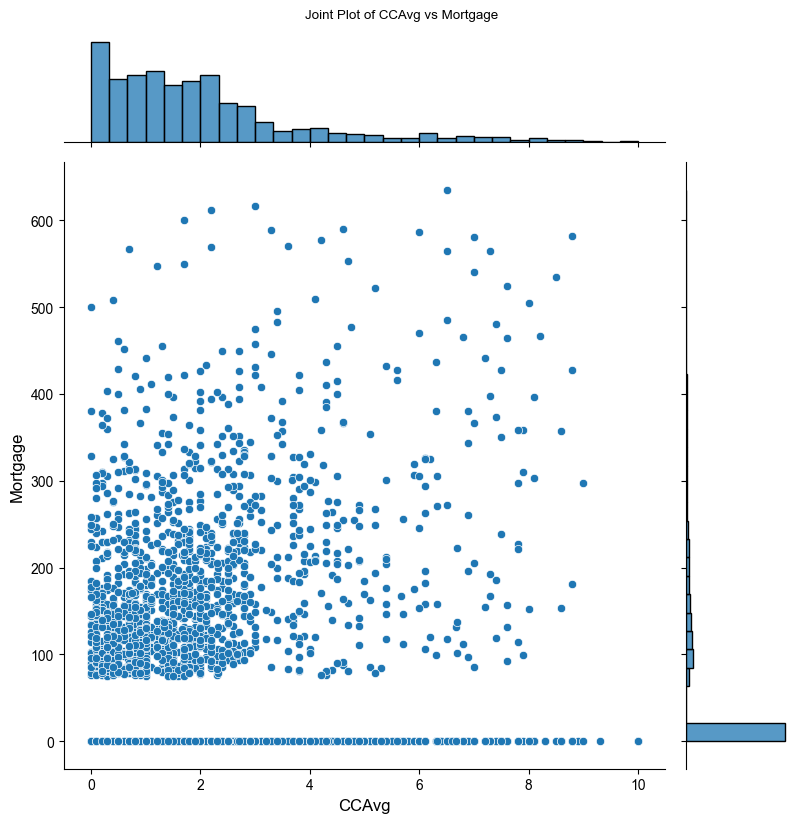

In [771]:
# Create a joint plot to visualize the relationship between CCAvg and Mortgage.
sns.jointplot(x='CCAvg', y='Mortgage', data=personal_loan_df, kind='scatter', height=8, marginal_kws=dict(bins=30, fill=True))
plt.suptitle('Joint Plot of CCAvg vs Mortgage', y=1.02)
plt.show()

**Observations**
* The lower average credit card spending is associated with lower mortgage values, as indicated by the dense cluster of data points at the origin.
* As ‘CCAvg’ increases, there is more spread in the ‘Mortgage’ values, but no clear upward or downward trend is visible.
* Customers with lower credit card spending tend to have lower mortgage amounts.
* There is no straightforward linear relationship between credit card spending and mortgage values.

#### **Question 17:** What are the relationships between Predictor and Target?

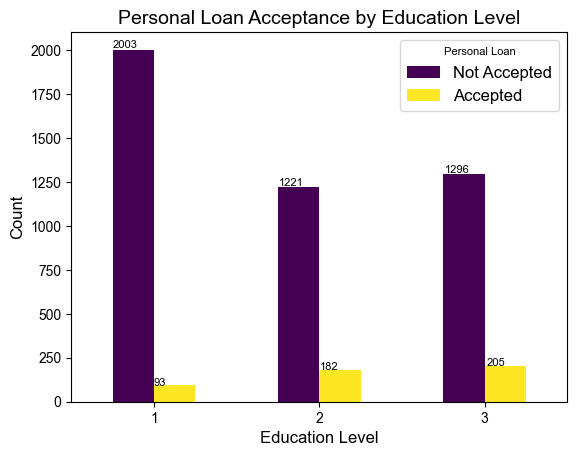

In [772]:
# Create a crosstab to count the occurrences of each Personal_Loan status within 
# each Education level.
education_loan_crosstab = pd.crosstab(personal_loan_df['Education'], personal_loan_df['Personal_Loan'])

# Plot the bar plot.
ax = education_loan_crosstab.plot(kind='bar', colormap='viridis')
plt.title('Personal Loan Acceptance by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['Not Accepted', 'Accepted'])
plt.xticks(rotation=0)

# Add totals on top of the bars.
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

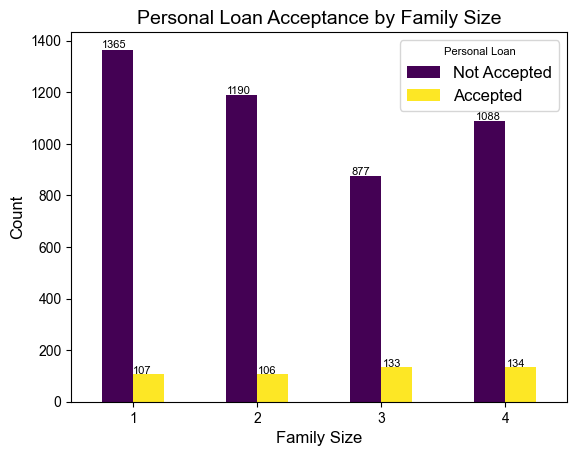

In [773]:
# Create a crosstab to count the occurrences of each Personal_Loan status for family size.
family_crosstab = pd.crosstab(personal_loan_df['Family'], personal_loan_df['Personal_Loan'])

# Plot the bar plot.
ax = family_crosstab.plot(kind='bar', colormap='viridis')
plt.title('Personal Loan Acceptance by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['Not Accepted', 'Accepted'])
plt.xticks(rotation=0)

# Add totals on top of the bars.
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

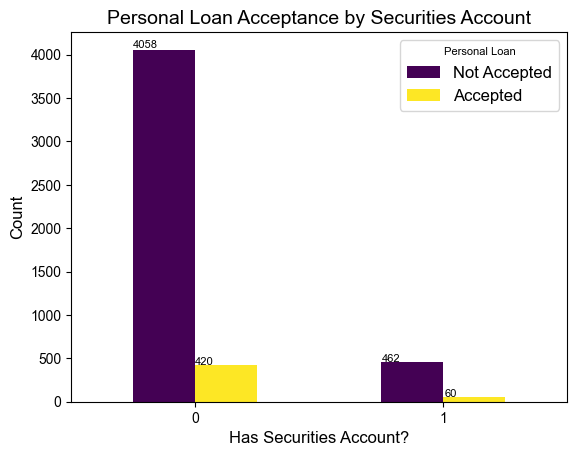

In [774]:
# Create a crosstab to count the occurrences of each Personal_Loan status for Security Account holders.
sec_acct_crosstab = pd.crosstab(personal_loan_df['Securities_Account'], personal_loan_df['Personal_Loan'])

# Plot the bar plot.
ax = sec_acct_crosstab.plot(kind='bar', colormap='viridis')
plt.title('Personal Loan Acceptance by Securities Account')
plt.xlabel('Has Securities Account?')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['Not Accepted', 'Accepted'])
plt.xticks(rotation=0)

# Add totals on top of the bars.
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [775]:
# Create a crosstab to count the occurrences of each Personal_Loan status for ZIP codes.
zipcode_crosstab = pd.crosstab(personal_loan_df['ZIPCode'], personal_loan_df['Personal_Loan'])

# Add a 'Total' column and row.
zipcode_crosstab['Total'] = zipcode_crosstab.sum(axis=1)

# Sort the table by the 'Total' column in descending order.
zipcode_crosstab = zipcode_crosstab.sort_values(by='Total', ascending=False)

# Add the 'Total' row after sorting.
zipcode_crosstab.loc['Total'] = zipcode_crosstab.sum()

print(zipcode_crosstab)

Personal_Loan     0    1  Total
ZIPCode                        
94720           150   19    169
94305           114   13    127
95616           110    6    116
90095            63    8     71
93106            53    4     57
...             ...  ...    ...
94965             1    0      1
90068             1    0      1
94970             1    0      1
91024             1    0      1
Total          4520  480   5000

[468 rows x 3 columns]


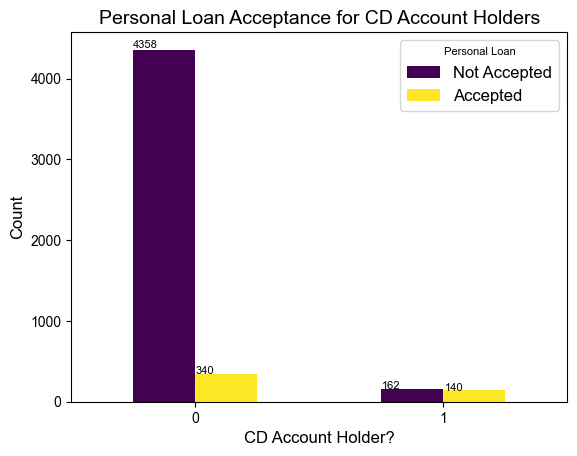

In [776]:
# Create a crosstab to count the occurrences of each Personal_Loan status for CD Account holders.
cd_acct_crosstab = pd.crosstab(personal_loan_df['CD_Account'], personal_loan_df['Personal_Loan'])

# Plot the bar plot.
ax = cd_acct_crosstab.plot(kind='bar', colormap='viridis')
plt.title('Personal Loan Acceptance for CD Account Holders')
plt.xlabel('CD Account Holder?')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['Not Accepted', 'Accepted'])
plt.xticks(rotation=0)

# Add totals on top of the bars.
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

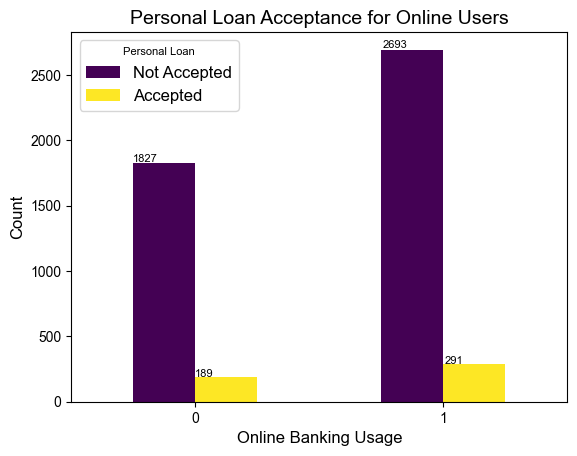

In [777]:
# Create a crosstab to count the occurrences of each Personal_Loan status for Online users.
cd_acct_crosstab = pd.crosstab(personal_loan_df['Online'], personal_loan_df['Personal_Loan'])

# Plot the bar plot.
ax = cd_acct_crosstab.plot(kind='bar', colormap='viridis')
plt.title('Personal Loan Acceptance for Online Users')
plt.xlabel('Online Banking Usage')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['Not Accepted', 'Accepted'])
plt.xticks(rotation=0)

# Add totals on top of the bars.
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

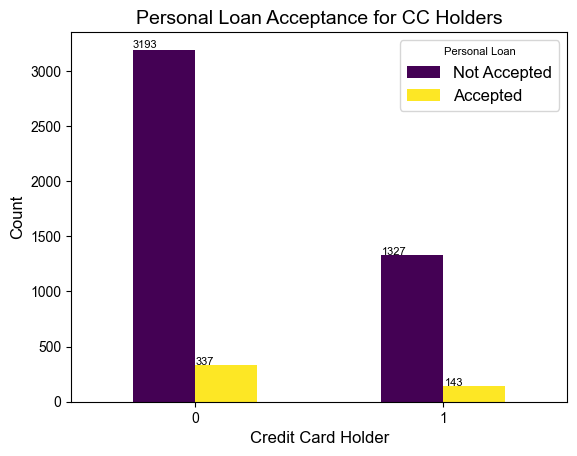

In [778]:
# Create a crosstab to count the occurrences of each Personal_Loan status for CC Holders.
cc_crosstab = pd.crosstab(personal_loan_df['CreditCard'], personal_loan_df['Personal_Loan'])

# Plot the bar plot.
ax = cc_crosstab.plot(kind='bar', colormap='viridis')
plt.title('Personal Loan Acceptance for CC Holders')
plt.xlabel('Credit Card Holder')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['Not Accepted', 'Accepted'])
plt.xticks(rotation=0)

# Add totals on top of the bars.
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

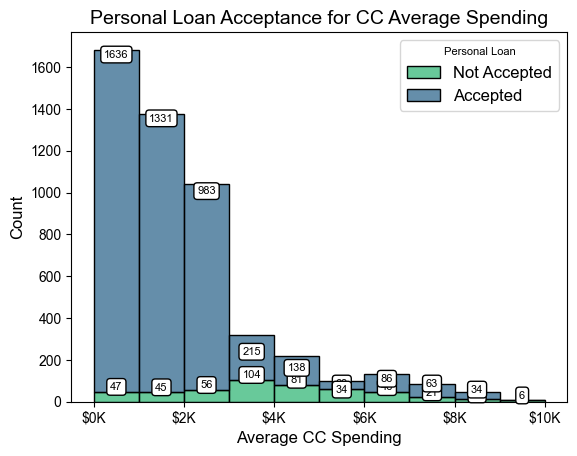

In [779]:
# Customize font properties for better readability.
plt.rcParams.update({
    'font.size': 8,
})

# Create a crosstab to count the occurrences of each Personal_Loan status for Average CC spending.
cc_crosstab = pd.crosstab(personal_loan_df['CCAvg'], personal_loan_df['Personal_Loan'])

# Reset the index to convert the crosstab into a DataFrame suitable for seaborn.
cc_crosstab = cc_crosstab.reset_index()

# Melt the DataFrame to long format for seaborn.
cc_crosstab_melted = cc_crosstab.melt(id_vars='CCAvg', value_vars=[0, 1], var_name='Personal_Loan', value_name='Count')

# Plot the histogram.
ax = sns.histplot(data=cc_crosstab_melted, x='CCAvg', hue='Personal_Loan', weights='Count', multiple='stack', palette='viridis')
plt.title('Personal Loan Acceptance for CC Average Spending')
plt.xlabel('Average CC Spending')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['Not Accepted', 'Accepted'])
plt.xticks(rotation=0)

# Function to format x-axis labels as dollars
def dollar_format(x, pos):
    return f'${x:,.0f}K'

# Apply the dollar format to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(dollar_format))

# Add values on top of the bars with a box around them.
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center', va='bottom',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.show()

---
---
## Data Preprocessing
* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [780]:
# Find anomalous values in the personal_loan_df DataFrame.
def detect_anomalous_values(df):
    anomalous_values = {}
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if not outliers.empty:
            anomalous_values[column] = outliers[column].values
    return anomalous_values

# Detect anomalous values in the personal_loan_df.
anomalous_values = detect_anomalous_values(personal_loan_df)

# Print the anomalous values.
for column, values in anomalous_values.items():
    print(f"Anomalous values in column '{column}': {values}")

Anomalous values in column 'Income': [193 194 190 188 195 191 200 205 204 195 192 194 202 195 200 193 192 195
 191 188 191 190 190 194 195 192 190 195 191 192 195 192 193 190 198 201
 200 188 192 190 194 201 191 191 188 203 189 193 190 204 198 201 201 191
 191 195 190 188 190 195 195 205 198 190 191 191 195 194 194 202 191 199
 203 188 224 188 189 191 190 195 193 204 194 195 191 188 195 188 193 199
 188 199 194 201 195 218]
Anomalous values in column 'CCAvg': [ 8.9   8.1   5.7   8.    5.7   5.6   7.2   7.4   7.5   6.5   6.5   7.8
  7.9   6.8   7.4   7.5   7.9   6.2   5.5   6.9   7.5   7.3   6.1   6.33
  6.6   5.3   7.5   6.8   7.    6.6   6.3   7.5   5.7   8.3   5.5   6.9
  6.1   6.    8.    6.8   6.33  7.8   7.2   6.5   6.8   6.    7.2   8.6
  6.9   6.1   7.8   6.    7.6   7.4   6.1   7.    8.1   6.9   6.4   6.
  7.6   6.3   7.6  10.    6.    5.9   8.1   5.4   8.8   5.4   6.33  8.1
  8.8   5.7   7.6   7.3   7.    5.7   6.1   6.9   6.8   5.6   7.    6.5
  7.4   7.8   8.    7.    8.    

In [781]:
# Find the the outliers with Interquartile Range (IQR).
Q1 = personal_loan_df.quantile(0.25)
Q3 = personal_loan_df.quantile(0.75)

IQR = Q3 - Q1

lower = (
    Q1 - 1.5 * IQR
)
upper = Q3 + 1.5 * IQR
(
    (personal_loan_df.select_dtypes(include=['float64', 'int64']) < lower)
    | (personal_loan_df.select_dtypes(include=['float64', 'int64']) > upper)
).sum() / len(personal_loan_df) * 100

Age                    0.00
Experience             0.00
Income                 1.92
ZIPCode                0.00
Family                 0.00
CCAvg                  6.48
Education              0.00
Mortgage               5.82
Personal_Loan          9.60
Securities_Account    10.44
CD_Account             6.04
Online                 0.00
CreditCard             0.00
dtype: float64

In [782]:
# Find number of unique ZIP codes.
print('Number of unique ZIP codes:', personal_loan_df['ZIPCode'].nunique())

# Calculate the distribution of ZIP codes.
zipcode_distribution = personal_loan_df['ZIPCode'].value_counts()

# Print first 20 ZIP codes.
print('Distribution of ZIP codes:')
print(zipcode_distribution.head(20))

Number of unique ZIP codes: 467
Distribution of ZIP codes:
94720    169
94305    127
95616    116
90095     71
93106     57
93943     54
92037     54
91320     53
91711     52
94025     52
92093     51
90024     50
90245     50
90089     46
91330     46
92121     45
94304     45
94143     37
95051     34
94608     34
Name: ZIPCode, dtype: int64


In [783]:
# Convert ZIPCode to string.
personal_loan_df['ZIPCode'] = personal_loan_df['ZIPCode'].astype(str)

# Extract the first two digits of ZIPCode and count unique values.
num_unique_zip_codes = personal_loan_df['ZIPCode'].str[0:2].nunique()

# Print the number of unique ZIP codes.
print('Number of unique values if we take first two digits of ZIPCode:', num_unique_zip_codes)

# Convert ZIPCode to categorical.
personal_loan_df['ZIPCode'] = personal_loan_df['ZIPCode'].astype('category')

Number of unique values if we take first two digits of ZIPCode: 7


In [784]:
# Check for unique values in the dataset.
personal_loan_df.nunique()

Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
AgeGroup                5
dtype: int64

In [785]:
# Find the unqiue numbers and count of unique values in the Experience column.
print('Unique values for Experience: ' + str(personal_loan_df['Experience'].unique()) + '\n')
print('Number of unique values in Experience:', personal_loan_df['Experience'].nunique())

Unique values for Experience: [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]

Number of unique values in Experience: 47


In [786]:
# Check for negative values in the Experience column.
print('Current nagative values: ' + str(personal_loan_df[personal_loan_df['Experience'] < 0]['Experience'].unique()))
print('Number of negative values: ' + str(personal_loan_df[personal_loan_df['Experience'] < 0]['Experience'].nunique()))

# Replace negative values in the Experience column.
personal_loan_df['Experience'].replace(-1, 1, inplace=True)
personal_loan_df['Experience'].replace(-2, 2, inplace=True)
personal_loan_df['Experience'].replace(-3, 3, inplace=True)

print('Unique values for Experience: \n' + str(personal_loan_df['Experience'].unique()) + '\n')
print('Number of unique values in Experience:', personal_loan_df['Experience'].nunique())

Current nagative values: [-1 -2 -3]
Number of negative values: 3
Unique values for Experience: 
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 34  0 38 40 33  4 42 43]

Number of unique values in Experience: 44


In [787]:
# Check for negative values in the Experience column.
print('Current values: ' + str(personal_loan_df['Education'].unique()))
print('Number of values: ' + str(personal_loan_df['Education'].nunique()))

Current values: [1 2 3]
Number of values: 3


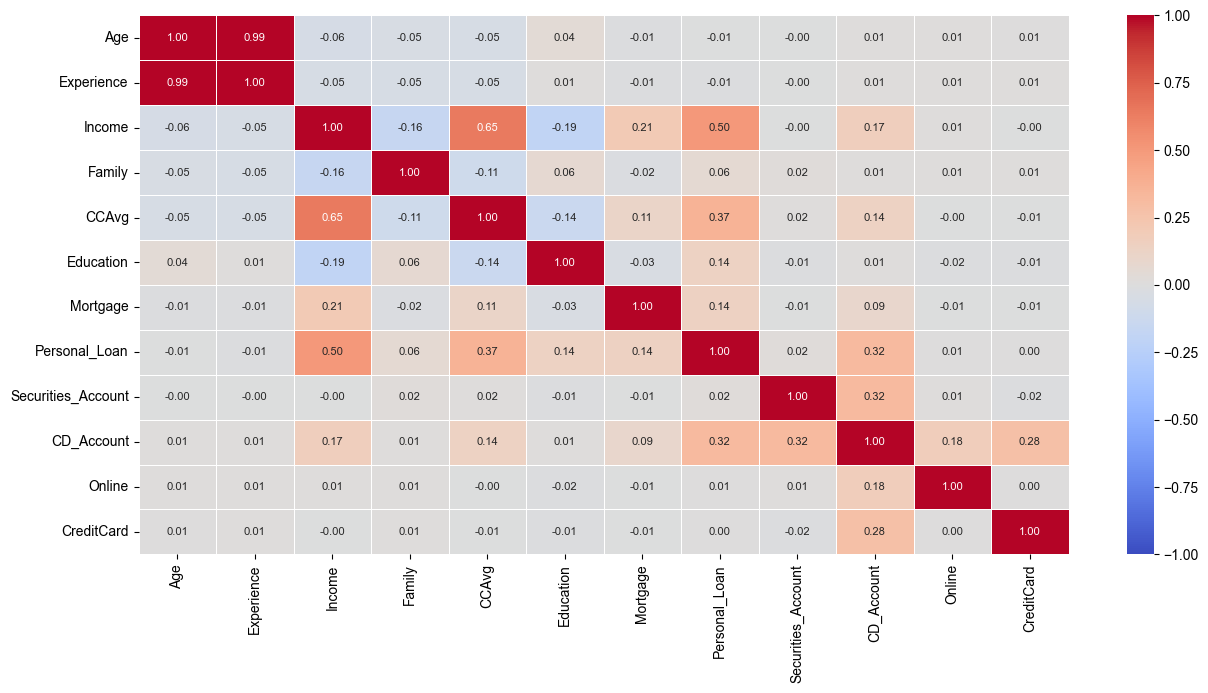

In [788]:
# Plot the correlation matrix as a heatmap.
plt.figure(figsize=(15, 7))
sns.heatmap(personal_loan_df.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()

In [789]:
# Dropping Experience as it is perfectly correlated with Age, 0.99
X = personal_loan_df.drop(['Personal_Loan', 'Experience'], axis=1)
Y = personal_loan_df['Personal_Loan']

X = pd.get_dummies(X, columns=['ZIPCode', 'Education'], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [790]:
# Print the shape of the training set.
print('Shape of Training set : ', X_train.shape)

# Print the shape of the test set.
print('Shape of test set : ', X_test.shape)

# Print a blank line for better readability.
print()

# Print the percentage distribution of classes in the training set.
print('Percentage of classes in training set:')
print(y_train.value_counts(normalize=True).to_dict())

# Print a blank line for better readability.
print()

# Print the percentage distribution of classes in the test set.
print('Percentage of classes in test set:')
print(y_test.value_counts(normalize=True).to_dict())

Shape of Training set :  (3500, 478)
Shape of test set :  (1500, 478)

Percentage of classes in training set:
{0: 0.9054285714285715, 1: 0.09457142857142857}

Percentage of classes in test set:
{0: 0.9006666666666666, 1: 0.09933333333333333}


In [791]:
# Feature engineering

# Change categorical features to 'category'.
category_cols = [
    'Education',
    'Personal_Loan',
    'Securities_Account',
    'CD_Account',
    'Online',
    'CreditCard',
    'ZIPCode',
]
personal_loan_df[category_cols] = personal_loan_df[category_cols].astype('category')

# Check for changes in the data types.
categorical_columns = personal_loan_df.select_dtypes(include=['category']).columns.tolist()

# Print the categorical columns.
print('Categorical columns:', categorical_columns)

Categorical columns: ['ZIPCode', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'AgeGroup']


## Model Building

In [853]:
# Encode categorical variables using one-hot encoding.
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Ensure the training and test sets have the same columns after encoding.
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Initialize the DecisionTreeClassifier with the Gini impurity criterion and a fixed random state.
model = DecisionTreeClassifier(
    criterion="gini", 
    random_state=1,
    # max_depth=5,            # Limit the maximum depth of the tree
    # min_samples_split=10,   # Minimum number of samples required to split an internal node
    # min_samples_leaf=5,     # Minimum number of samples required to be at a leaf node
    # max_leaf_nodes=20       # Maximum number of leaf nodes
)

# Fit the model on the encoded training data.
model.fit(X_train_encoded, y_train)

DecisionTreeClassifier(random_state=1)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3169
           1       1.00      1.00      1.00       331

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



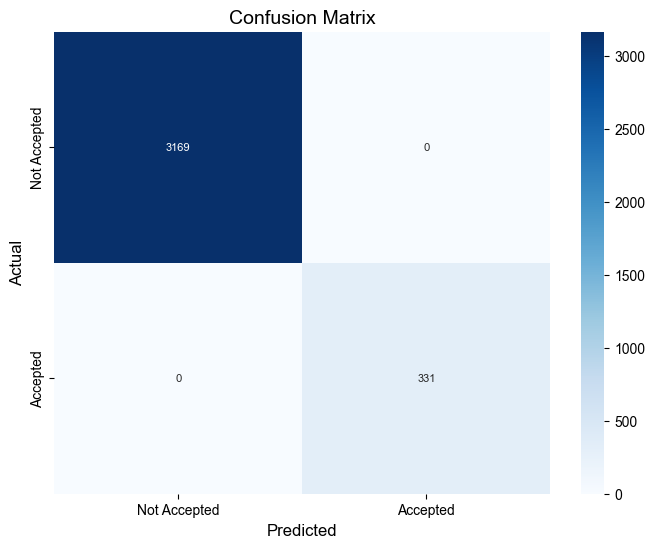

In [795]:
# Predict on the training data.
y_train_pred = model.predict(X_train_encoded)

# Calculate accuracy.
accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision.
precision = precision_score(y_train, y_train_pred)
print(f'Precision: {precision:.2f}')

# Calculate recall.
recall = recall_score(y_train, y_train_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1 score.
f1 = f1_score(y_train, y_train_pred)
print(f'F1 Score: {f1:.2f}')

# Print classification report.
print('Classification Report:')
print(classification_report(y_train, y_train_pred))

# Calculate confusion matrix.
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Accepted', 'Accepted'], yticklabels=['Not Accepted', 'Accepted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [796]:
# Function for model performance evaluation.

def model_performance_classification_sklearn(model, X, y):
    # Predict the labels for the input features X using the provided model.
    y_pred = model.predict(X)
    
    # Calculate the accuracy of the model.
    accuracy = accuracy_score(y, y_pred)
    
    # Calculate the precision of the model.
    precision = precision_score(y, y_pred)
    
    # Calculate the recall of the model.
    recall = recall_score(y, y_pred)
    
    # Calculate the F1 score of the model.
    f1 = f1_score(y, y_pred)
    
    # Return a dictionary containing the performance metrics.
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

In [854]:
# Check performance on training data.
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train_encoded, y_train
)
decision_tree_perf_train

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}

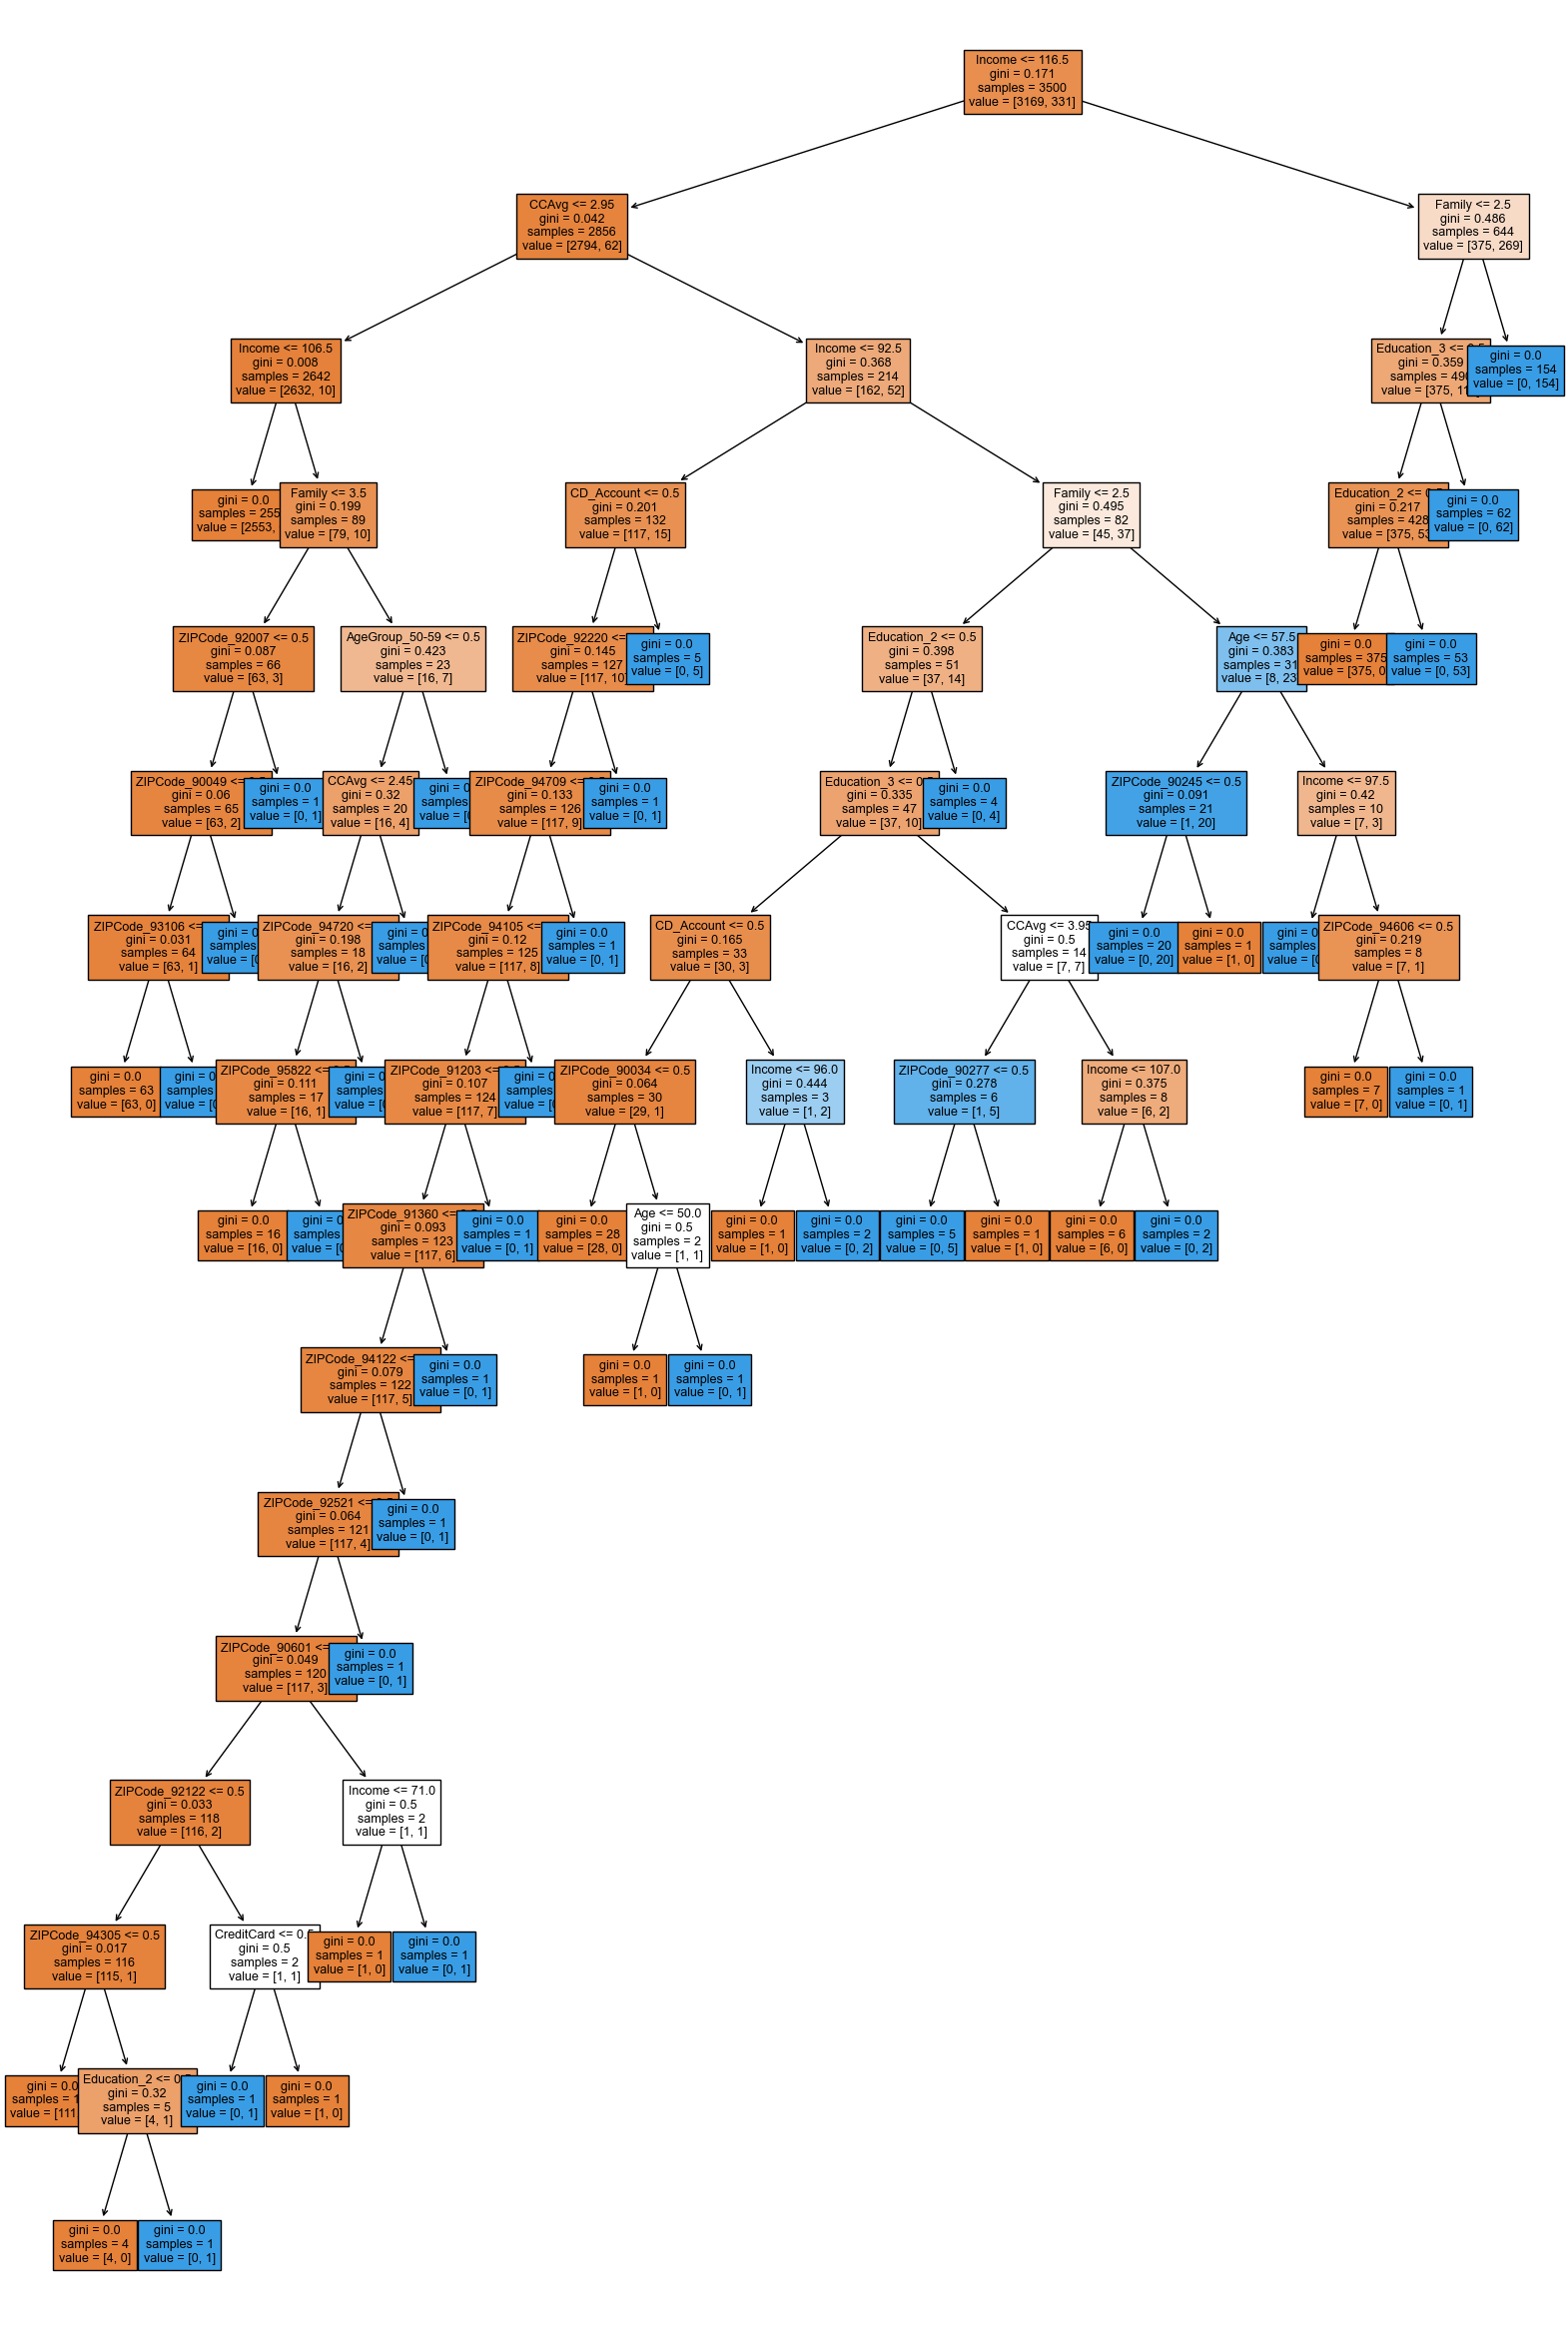

In [800]:
# Visualize the decision tree.
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model, # type: ignore
    feature_names=list(X_train_encoded.columns),  # type: ignore
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# Add arrows to the decision tree split if they are missing.
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [802]:
# Generate a text report showing the rules of the decision tree.
tree_rules = tree.export_text(model, feature_names=list(X_train_encoded.columns), show_weights=True) # type: ignore
print(tree_rules)

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_92007 <= 0.50
|   |   |   |   |   |--- ZIPCode_90049 <= 0.50
|   |   |   |   |   |   |--- ZIPCode_93106 <= 0.50
|   |   |   |   |   |   |   |--- weights: [63.00, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_93106 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- ZIPCode_90049 >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_92007 >  0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Family >  3.50
|   |   |   |   |--- AgeGroup_50-59 <= 0.50
|   |   |   |   |   |--- CCAvg <= 2.45
|   |   |   |   |   |   |--- ZIPCode_94720 <= 0.50
|   |   |   |   |   |   |   |--- ZIPCode_95822 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [16.00, 0.00] clas

In [803]:
# Assign the feature importances to a variable.
importances = model.feature_importances_

# Sort indices in descending order.
indices = np.argsort(importances)[::-1]  

# Create a DataFrame for feature importances.
feature_importances_df = pd.DataFrame({
    'Feature': [list(X_train_encoded.columns)[i] for i in indices],  # type: ignore
    'Importance': importances[indices]
})

# Print the DataFrame.
print(feature_importances_df)

           Feature  Importance
0           Income    0.310801
1           Family    0.246862
2      Education_2    0.165238
3      Education_3    0.144207
4            CCAvg    0.046435
..             ...         ...
477  ZIPCode_94302    0.000000
478  ZIPCode_94303    0.000000
479  ZIPCode_94304    0.000000
480  ZIPCode_94306    0.000000
481  ZIPCode_93014    0.000000

[482 rows x 2 columns]


Accuracy: 0.98
Precision: 0.96
Recall: 0.87
F1 Score: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1351
           1       0.96      0.87      0.91       149

    accuracy                           0.98      1500
   macro avg       0.97      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



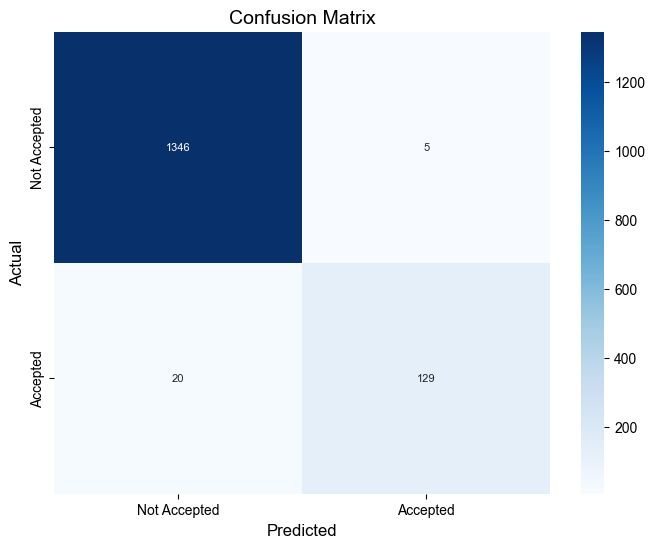

In [805]:
# Check model performance on the test data. 

# Predict on the test data.
y_test_pred = model.predict(X_test_encoded) # type: ignore

# Calculate accuracy.
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision.
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.2f}')

# Calculate recall.
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1 score.
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.2f}')

# Print classification report.
print('Classification Report:')
print(classification_report(y_test, y_test_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Accepted', 'Accepted'], yticklabels=['Not Accepted', 'Accepted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [807]:
# Check performance on the test data.
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test_encoded, y_test) # type: ignore
decision_tree_perf_test

{'Accuracy': 0.9833333333333333,
 'Precision': 0.9626865671641791,
 'Recall': 0.8657718120805369,
 'F1 Score': 0.9116607773851589}

### Pre-Pruning

In [809]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Hyperparameter grid.
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations.
acc_scorer = make_scorer(recall_score)

# Run the grid search.
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train_encoded, y_train) # type: ignore

# Set the clf to the best combination of parameters.
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train_encoded, y_train) # type: ignore

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=1)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3169
           1       1.00      1.00      1.00       331

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



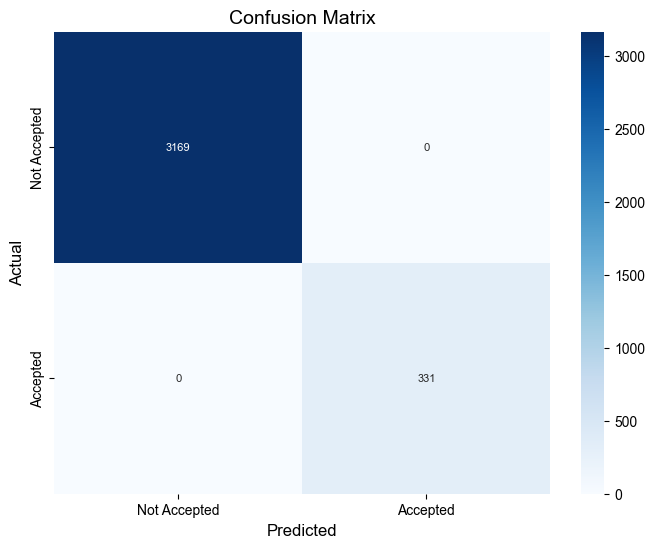

In [811]:
# Check model performance on the test data. 

# Predict on the test data.
y_test_pred = model.predict(X_train_encoded) # type: ignore

# Calculate accuracy.
accuracy = accuracy_score(y_train, y_train_pred) # type: ignore
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision.
precision = precision_score(y_train, y_train_pred) # type: ignore
print(f'Precision: {precision:.2f}')

# Calculate recall.
recall = recall_score(y_train, y_train_pred) # type: ignore
print(f'Recall: {recall:.2f}')

# Calculate F1 score.
f1 = f1_score(y_train, y_train_pred) # type: ignore
print(f'F1 Score: {f1:.2f}')

# Print classification report.
print('Classification Report:')
print(classification_report(y_train, y_train_pred)) # type: ignore

# Calculate confusion matrix.
conf_matrix = confusion_matrix(y_train, y_train_pred) # type: ignore

# Plot confusion matrix.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Accepted', 'Accepted'], yticklabels=['Not Accepted', 'Accepted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [813]:


# Check performance on the tuned data.
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train_encoded, y_train) # type: ignore
decision_tree_tune_perf_train

{'Accuracy': 0.9877142857142858,
 'Precision': 0.996551724137931,
 'Recall': 0.8731117824773413,
 'F1 Score': 0.9307568438003219}

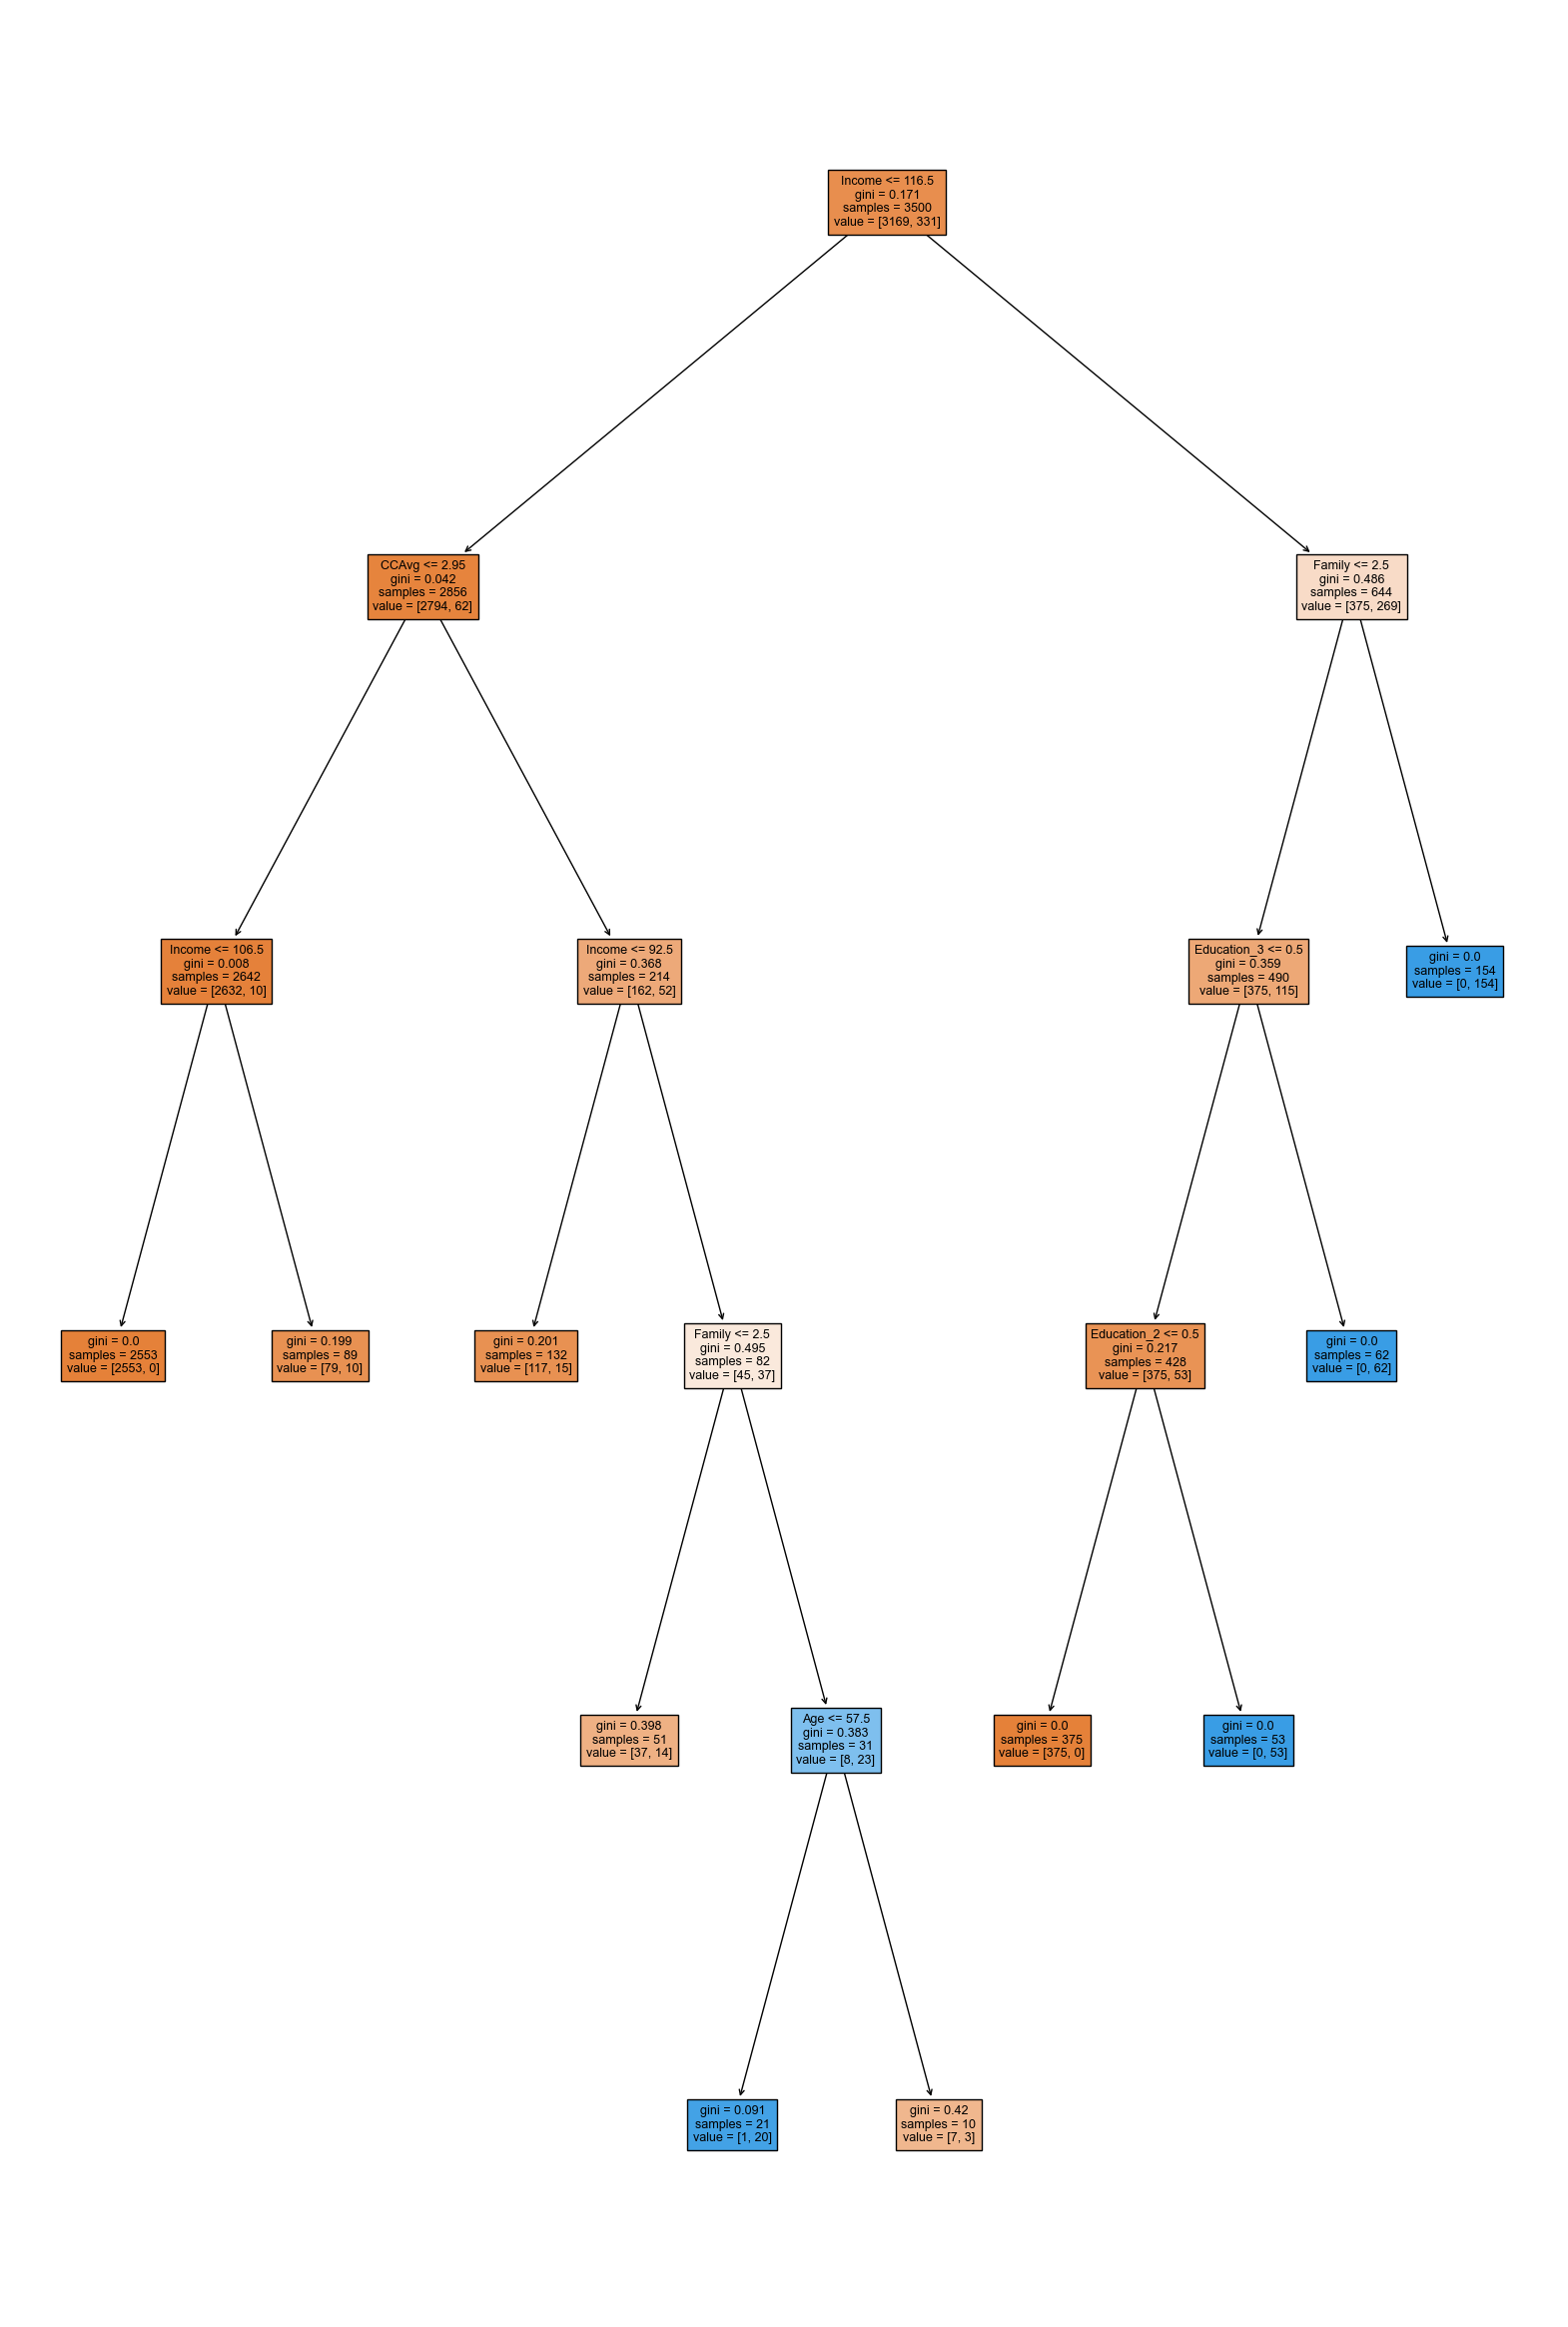

In [814]:
# Visualize the decision tree.
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    estimator,
    feature_names=list(X_train_encoded.columns), # type: ignore
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# Add arrows to the decision tree split if they are missing.
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

Accuracy: 0.99
Precision: 1.00
Recall: 0.87
F1 Score: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3169
           1       1.00      0.87      0.93       331

    accuracy                           0.99      3500
   macro avg       0.99      0.94      0.96      3500
weighted avg       0.99      0.99      0.99      3500



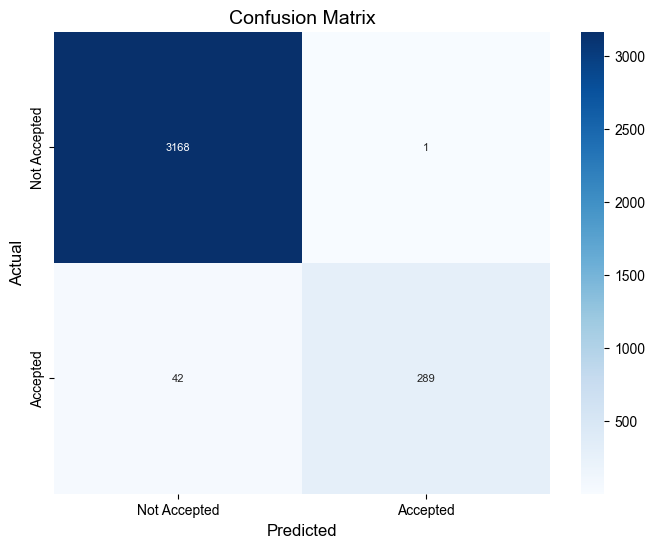

In [815]:
# Predict on the training data.
y_train_pred = estimator.predict(X_train_encoded) # type: ignore

# Calculate accuracy.
accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision.
precision = precision_score(y_train, y_train_pred)
print(f'Precision: {precision:.2f}')

# Calculate recall.
recall = recall_score(y_train, y_train_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1 score.
f1 = f1_score(y_train, y_train_pred)
print(f'F1 Score: {f1:.2f}')

# Print classification report.
print('Classification Report:')
print(classification_report(y_train, y_train_pred))

# Calculate confusion matrix.
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Accepted', 'Accepted'], yticklabels=['Not Accepted', 'Accepted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [816]:
# Generate a text report showing the rules of the decision tree.
tree_rules = tree.export_text(estimator, feature_names=list(X_train_encoded.columns), show_weights=True) # type: ignore
print(tree_rules)

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [37.00, 14.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- Age <= 57.50
|   |   |   |   |   |--- weights: [1.00, 20.00] class: 1
|   |   |   |   |--- Age >  57.50
|   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [0.00, 53.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [0.00, 62.00] class: 1
|   |--- Family >  2.

In [819]:
# Check performance on the test data.
decision_tree_tune_perf_test = model_performance_classification_sklearn(model, X_test_encoded, y_test)
decision_tree_tune_perf_test

{'Accuracy': 0.9833333333333333,
 'Precision': 0.9626865671641791,
 'Recall': 0.8657718120805369,
 'F1 Score': 0.9116607773851589}

In [836]:
# Compute the pruning path for the decision tree using minimal cost-complexity pruning.
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train_encoded, y_train) # type: ignore
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Create a DataFrame and sort by ccp_alphas in descending order.
pruning_path_df = pd.DataFrame(path)
pruning_path_df_sorted = pruning_path_df.sort_values(by='ccp_alphas', ascending=False)

# Show sorted pruning path values.
pruning_path_df_sorted

,ccp_alphas,impurities
23,0.047088,0.171255
22,0.039216,0.124167
21,0.025146,0.084951
20,0.006473,0.034659
19,0.003294,0.028187
18,0.002407,0.024893
17,0.002333,0.022486
16,0.001647,0.020153
15,0.001305,0.018505
14,0.000940,0.017200


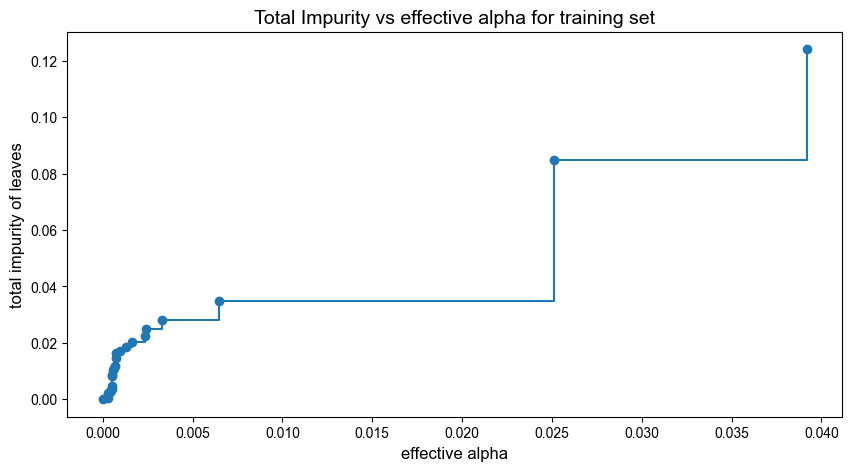

In [837]:
# Create a figure and an axis object with a specified size.
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the relationship between effective alpha and total impurity of leaves
# Use markers "o" and draw style "steps-post" for the plot.
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the label for the x-axis.
ax.set_xlabel("effective alpha")

# Set the label for the y-axis.
ax.set_ylabel("total impurity of leaves")

# Set the title of the plot.
ax.set_title("Total Impurity vs effective alpha for training set")

# Display the plot.
plt.show()

In [823]:
# Initialize an empty list to store the decision tree classifiers.
clfs = []

# Iterate over the list of ccp_alpha values.
for ccp_alpha in ccp_alphas:
    # Initialize a DecisionTreeClassifier with the current ccp_alpha value 
    # and a fixed random state.
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    
    # Fit the decision tree classifier on the training data.
    clf.fit(X_train_encoded, y_train) # type: ignore
    
    # Append the fitted classifier to the list.
    clfs.append(clf)

# Print the number of nodes in the last tree and the corresponding ccp_alpha value.
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


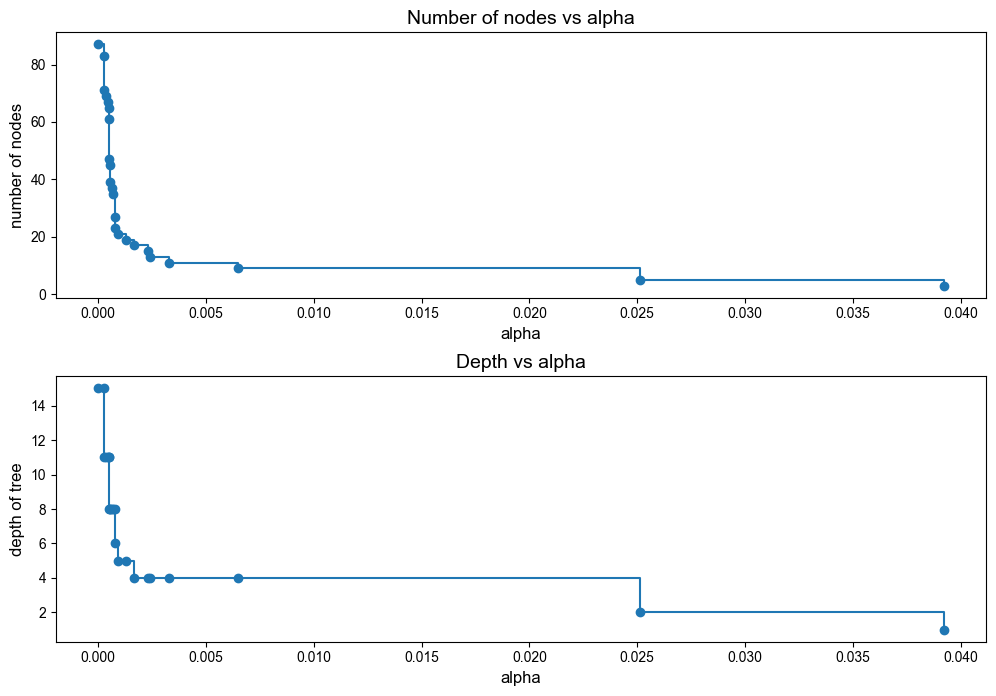

In [824]:
# Remove the last element from the list of classifiers and ccp_alphas.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Calculate the number of nodes for each classifier.
node_counts = [clf.tree_.node_count for clf in clfs]

# Calculate the depth of each classifier.
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure with two subplots, arranged vertically, with a specified size.
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes vs alpha on the first subplot.
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

# Plot the depth of the tree vs alpha on the second subplot.
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")

# Adjust the layout to prevent overlap.
fig.tight_layout()

In [855]:
# Initialize an empty list to store recall scores for the training set.
recall_train = []

# Iterate over the list of classifiers.
for clf in clfs:
    # Predict the labels for the training set using the current classifier.
    pred_train = clf.predict(X_train_encoded)
    
    # Calculate the recall score for the training set.
    values_train = recall_score(y_train, pred_train)
    
    # Append the recall score to the recall_train list.
    recall_train.append(values_train)

# Initialize an empty list to store recall scores for the test set.
recall_test = []

# Iterate over the list of classifiers.
for clf in clfs:
    # Predict the labels for the test set using the current classifier.
    pred_test = clf.predict(X_test_encoded) # type: ignore
    
    # Calculate the recall score for the test set.
    values_test = recall_score(y_test, pred_test)
    
    # Append the recall score to the recall_test list.
    recall_test.append(values_test)

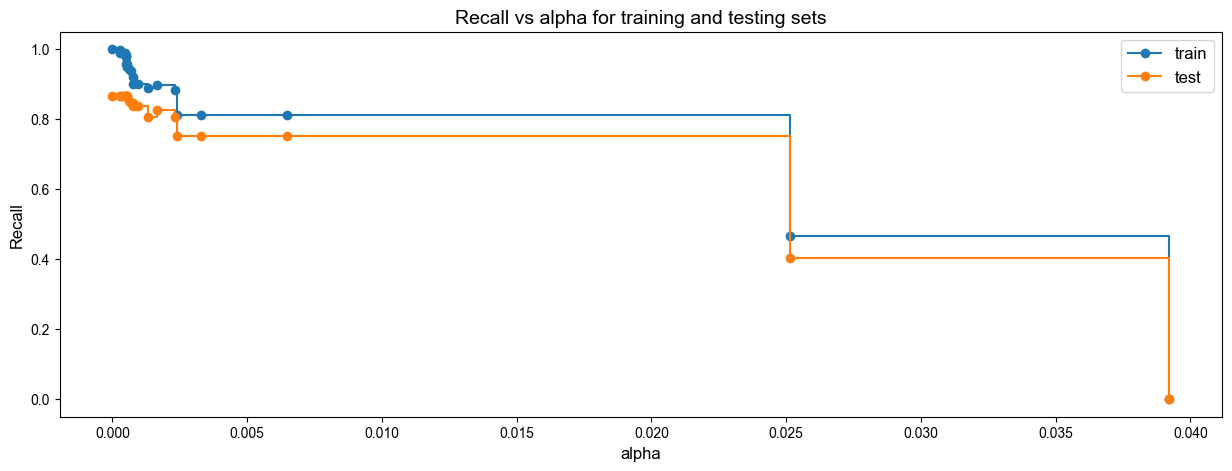

In [826]:
# Create a figure and an axis object with a specified size.
fig, ax = plt.subplots(figsize=(15, 5))

# Set the label for the x-axis.
ax.set_xlabel("alpha")

# Set the label for the y-axis.
ax.set_ylabel("Recall")

# Set the title of the plot.
ax.set_title("Recall vs alpha for training and testing sets")

# Plot the recall scores for the training set vs alpha.
# Use markers "o" and draw style "steps-post" for the plot.
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")

# Plot the recall scores for the test set vs alpha.
# Use markers "o" and draw style "steps-post" for the plot.
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")

# Add a legend to the plot.
ax.legend()

# Display the plot.
plt.show()

In [827]:
# Find the index of the classifier with the highest recall score on the test set.
index_best_model = np.argmax(recall_test)

# Select the classifier corresponding to the best recall score.
best_model = clfs[index_best_model]

# Print the details of the best model.
print(best_model)

DecisionTreeClassifier(random_state=1)


### Post-Pruning

In [828]:
# Initialize the DecisionTreeClassifier with the last ccp_alpha value from the pruning path,
# set class weights to handle class imbalance, and set a random state for reproducibility.
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=ccp_alphas[-1],  # Use the last ccp_alpha value.
    class_weight={0: 0.15, 1: 0.85},  # Set class weights.
    random_state=1  # Set random state for reproducibility.
)

# Fit the classifier on the training data.
estimator_2.fit(X_train_encoded, y_train) # type: ignore

DecisionTreeClassifier(ccp_alpha=0.03921599695778932,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

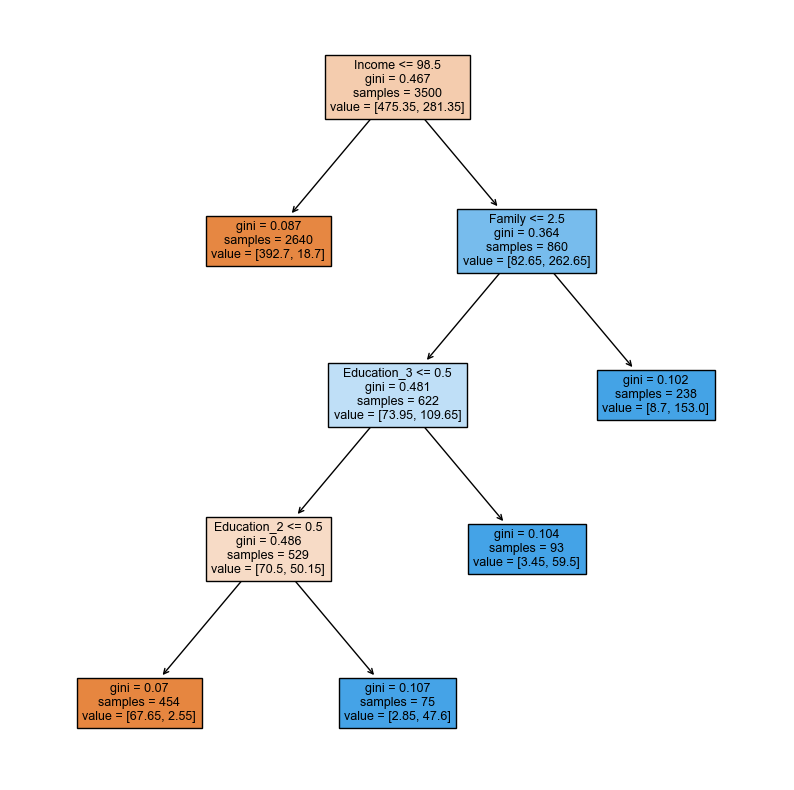

In [829]:
# Visualize the decision tree.
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=list(X_train_encoded.columns), # type: ignore
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# Add arrows to the decision tree split if they are missing.
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [830]:
# Generate a text report showing the rules of the decision tree.
tree_rules = tree.export_text(estimator_2, feature_names=list(X_train_encoded.columns),show_weights=True) # type: ignore
print(tree_rules)

|--- Income <= 98.50
|   |--- weights: [392.70, 18.70] class: 0
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [2.85, 47.60] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [3.45, 59.50] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [8.70, 153.00] class: 1



In [831]:
# Check performance on the test data.
decision_tree_tune_post_train = model_performance_classification_sklearn(model, X_train_encoded, y_train) # type: ignore
decision_tree_tune_post_train

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}

In [833]:
# Assign the feature importances to a variable.
importances = estimator_2.feature_importances_

# Sort indices in descending order.
indices = np.argsort(importances)[::-1]  

# Create a DataFrame for feature importances.
feature_importances_df = pd.DataFrame({
    'Feature': [list(X_train_encoded.columns)[i] for i in indices], # type: ignore
    'Importance': importances[indices]
})

# Print the DataFrame.
print(feature_importances_df)

            Feature  Importance
0            Income    0.675027
1       Education_2    0.169826
2       Education_3    0.081541
3            Family    0.073607
4    AgeGroup_60-69    0.000000
..              ...         ...
477   ZIPCode_94305    0.000000
478   ZIPCode_94306    0.000000
479   ZIPCode_94309    0.000000
480   ZIPCode_94402    0.000000
481             Age    0.000000

[482 rows x 2 columns]


In [835]:
# Check performance on the training data.
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train_encoded, y_train) # type: ignore
decision_tree_tune_post_train

{'Accuracy': 0.9642857142857143,
 'Precision': 0.7536945812807881,
 'Recall': 0.9244712990936556,
 'F1 Score': 0.8303934871099049}

---
---
## Model Comparison and Final Model Selection

In [846]:
# Training data performance comparison.

# Convert dictionaries to DataFrames
decision_tree_perf_train_df = pd.DataFrame.from_dict(decision_tree_perf_train, orient='index') # type: ignore
decision_tree_tune_perf_train_df = pd.DataFrame.from_dict(decision_tree_tune_perf_train, orient='index')

# Concatenate the performance DataFrames along the columns
models_train_comp_df = pd.concat(
    [decision_tree_perf_train_df, decision_tree_tune_perf_train_df], axis=1
)

# Set the column names for the concatenated DataFrame
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]

# Print the training performance comparison
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning)
Accuracy,1.0,0.987714
Precision,1.0,0.996552
Recall,1.0,0.873112
F1 Score,1.0,0.930757


In [845]:
# Test data performance comparison.

# Convert dictionaries to DataFrames
decision_tree_perf_test_df = pd.DataFrame.from_dict(decision_tree_perf_test, orient='index')
decision_tree_tune_post_test_df = pd.DataFrame.from_dict(decision_tree_tune_post_train, orient='index')

# Concatenate the performance DataFrames along the columns
models_train_comp_df = pd.concat(
    [decision_tree_perf_test_df, decision_tree_tune_post_test_df], axis=1
)

# Set the column names for the concatenated DataFrame
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Post-Pruning)"]

# Print the training performance comparison
print("Test performance comparison:")
models_train_comp_df

Test performance comparison:


,Decision Tree sklearn,Decision Tree (Post-Pruning)
Accuracy,0.983333,0.964286
Precision,0.962687,0.753695
Recall,0.865772,0.924471
F1 Score,0.911661,0.830393


---
---
## Actionable Insights and Business Recommendations


### **Model Insights**

The pre-pruning model has higher accuracy (0.987714) compared to the post-pruning model (0.964286). Pre-pruning also has a higher precision (0.996552) but recall is lower (0.873112) than post-pruning (0.924471). Recommendation is to use the pre-pruning model based on accuracy, precision and F1 score. Things to consider if the post-pruning model would be used is that is has better recall but lower precision. 

### **Recommendations**

 1. **Data Overall**:
      * Collect additional data to better understand why loans are not being accepted. Example, are people not accepting loans because they have defaulted with other banks? 
      * Collect satisfaction data for various services, eg. Online Banking, CD and Securities accounts, CC accounts.
      * Collect payment data to see if customers are missing payments which would determine if offers are made to specific customers or an entire demographic. 
      * Collect loyalty time. How long has a customer been a member of the bank? 

2. **Feature Importance**:
      * Based on the current data there may be other features to add/indentify for other business strategies. Example, if customer demographics are important predictors then a marketing campaign or different services could be targeted.

3. **Customer Segmentation**:
      * Review the different ZIP codes and possibly offer targeted campaigns or special programs for higher value services (loans, CCs, etc.). These personal loans could be larger amounts than those on the lower end of income.
      * Review customer accounts for those on the lower end and determine if offering lower loan amounts with reduced rates could bolster this demographic to accept personal loans.

4. **Loyalty**:
      * Create a loyalty program with better rates and service fees.

5. **Business Processes**:
      * Use the model to automate parts of the personal loan approval process. By doing this it would reduce the time and effort required to make an offer and manual reviews of applicants. This can lead to faster loan processing and improved customer satisfaction.
      * As part of automation implement stricter credit checks or offer smaller loan amounts to  customers to mitigate risk. Analysis of income and average CC information can be used to make determinations. 
      * Actively monitor the performance of the model. As new data is available ensure to update the model periodically to ensure it remains accurate and relevant.


___